# Project Overview
This project seeks to gain deeper insights into breast cancer survival trends and enhance the accuracy of predicting a patient’s 10-year mortality risk. By utilizing advanced statistical methods and machine learning, the study aims to develop more reliable models that can support:

*Better treatment planning for healthcare providers
*Clearer risk assessments to guide patient counseling
*Improved cancer care strategies for enhanced patient outcomes
The insights gained from this research will contribute to more personalized cancer care strategies, ultimately improving patient outcomes and healthcare effectiveness.

# Step 1 : Importing all the libraries needed

In [393]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors  # Add this line

# Display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# Machine learning and metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve,mean_absolute_error,
                             mean_squared_error, r2_score, f1_score)
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Statistical tests and transformations
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from scipy.stats import normaltest, skew, shapiro, kstest

# Survival analysis
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
from lifelines import CoxPHFitter

# Visualization of models
from IPython.display import Image
from tensorflow.keras.utils import plot_model
import keras
from keras import layers

# Suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [395]:
df_cancer_survival = pd.read_csv('Breast Cancer METABRIC.csv')
df_cancer_survival.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.650000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.000000,Positve,Positive,3.000000,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.000000,NaN,6.044000,IDC,140.500000,Living,Negative,Yes,138.650000,Not Recurred,Female,ER-/HER2-,22.000000,2.000000,Living
1,MB-0002,43.190000,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.000000,Positve,Positive,3.000000,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.000000,2.000000,4.020000,IDC,84.633333,Living,Positive,Yes,83.520000,Not Recurred,Female,ER+/HER2- High Prolif,10.000000,1.000000,Living
2,MB-0005,48.870000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.000000,Positve,Positive,2.000000,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.000000,2.000000,4.030000,IDC,163.700000,Deceased,Positive,No,151.280000,Recurred,Female,NaN,15.000000,2.000000,Died of Disease
3,MB-0006,47.680000,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.000000,Positve,Positive,2.000000,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.000000,1.000000,4.050000,MDLC,164.933333,Living,Positive,Yes,162.760000,Not Recurred,Female,NaN,25.000000,2.000000,Living
4,MB-0008,76.970000,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.000000,Positve,Positive,3.000000,Neutral,Negative,Mixed,Yes,Post,9,Right,8.000000,2.000000,6.080000,MDLC,41.366667,Deceased,Positive,Yes,18.550000,Recurred,Female,ER+/HER2- High Prolif,40.000000,2.000000,Died of Disease


In [397]:
df_cancer_survival.shape

(2509, 34)

# Step 3 : Dataset Overview

| **Feature**                      | **Description**                                                                                       |
|----------------------------------|-------------------------------------------------------------------------------------------------------|
| Patient ID                       | Unique identifier for each patient.                                                                    |
| Age at Diagnosis                 | Age of the patient when diagnosed with cancer.                                                         |
| Type of Breast Surgery           | The type of surgery performed on the breast, such as mastectomy or lumpectomy.                         |
| Cancer Type                      | General classification of the cancer type (e.g., invasive ductal carcinoma).                           |
| Cancer Type Detailed             | More specific classification of the cancer type.                                                       |
| Cellularity                      | The degree of cellularity of the tumor, often used in pathology to describe the proportion of cells.   |
| Chemotherapy                     | Indicates whether the patient received chemotherapy (Yes/No).                                          |
| Pam50 + Claudin-low subtype      | Subtypes based on gene expression profiling, including Pam50 and Claudin-low classifications.          |
| Cohort                           | The group or study cohort to which the patient belongs.                                                |
| ER status measured by IHC        | Estrogen receptor status as measured by Immunohistochemistry (IHC) (e.g., positive or negative).       |
| ER Status                        | Estrogen receptor status (e.g., positive, negative).                                                   |
| Neoplasm Histologic Grade        | Histologic grade of the neoplasm, indicating how much the tumor cells differ from normal cells.        |
| HER2 status measured by SNP6     | HER2 (human epidermal growth factor receptor 2) status measured by SNP (single nucleotide polymorphism).|
| HER2 Status                      | HER2 receptor status (e.g., positive, negative).                                                       |
| Tumor Other Histologic Subtype   | Other histologic subtypes of the tumor not covered by main classifications.                            |
| Hormone Therapy                  | Indicates whether the patient received hormone therapy (Yes/No).                                       |
| Inferred Menopausal State        | Menopausal state inferred based on age and clinical criteria (e.g., premenopausal, postmenopausal).    |
| Integrative Cluster              | Classification based on integrative clustering of genomic data.                                        |
| Primary Tumor Laterality         | The side of the body where the primary tumor is located (left or right).                               |
| Lymph nodes examined positive    | Number of lymph nodes that tested positive for cancer.                                                 |
| Mutation Count                   | Total number of genetic mutations identified in the tumor.                                             |
| Nottingham prognostic index      | Prognostic score based on tumor size, lymph node status, and histologic grade.                         |
| Oncotree Code                    | A code that represents the type of cancer based on the OncoTree classification.                        |
| Overall Survival (Months)        | The overall survival time of the patient in months.                                                    |
| Overall Survival Status          | Indicates whether the patient is alive or deceased.                                                    |
| PR Status                        | Progesterone receptor status (e.g., positive, negative).                                               |
| Radio Therapy                    | Indicates whether the patient received radiotherapy (Yes/No).                                          |
| Relapse Free Status (Months)     | Time in months the patient remained free from cancer relapse.                                          |
| Relapse Free Status              | Indicates whether the patient has had a relapse of cancer (Yes/No).                                    |
| Sex                              | The sex of the patient (male or female).                                                               |
| 3-Gene classifier subtype        | Subtypes based on the expression of three specific genes.                                              |
| Tumor Size                       | Size of the primary tumor.                                                                             |
| Tumor Stage                      | Stage of the tumor, indicating the extent of cancer spread.                                            |
| Patient's Vital Status           | Indicates whether the patient is alive or deceased at the last follow-up.                              |

In [399]:
df_cleaned = df_cancer_survival[df_cancer_survival["Patient's Vital Status"] != "Died of Other Causes"]

In [401]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Diagnosis,2001.000000,58.135027,12.669469,21.930000,49.000000,58.380000,67.460000,96.290000
Cohort,2001.000000,2.886057,2.109505,1.000000,1.000000,3.000000,4.000000,9.000000
Neoplasm Histologic Grade,1930.000000,2.435751,0.644204,1.000000,2.000000,3.000000,3.000000,3.000000
Lymph nodes examined positive,1762.000000,2.081725,4.139135,0.000000,0.000000,0.000000,2.000000,45.000000
Mutation Count,1882.000000,5.413390,3.464591,1.000000,3.000000,5.000000,7.000000,35.000000
Nottingham prognostic index,1791.000000,4.109678,1.190906,1.000000,3.051000,4.046000,5.050000,7.200000
Overall Survival (Months),1484.000000,123.713410,77.998158,0.000000,55.708333,114.183333,185.625000,337.033333
Relapse Free Status (Months),1891.000000,105.899572,77.855708,0.000000,35.280000,94.610000,166.710000,384.210000
Tumor Size,1872.000000,26.260737,16.068304,1.000000,17.000000,22.000000,30.000000,182.000000
Tumor Stage,1453.000000,1.715760,0.671953,0.000000,1.000000,2.000000,2.000000,4.000000


In [403]:
# Display a concise summary of the dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2012 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2012 non-null   object 
 1   Age at Diagnosis                2001 non-null   float64
 2   Type of Breast Surgery          1466 non-null   object 
 3   Cancer Type                     2012 non-null   object 
 4   Cancer Type Detailed            2012 non-null   object 
 5   Cellularity                     1435 non-null   object 
 6   Chemotherapy                    1484 non-null   object 
 7   Pam50 + Claudin-low subtype     1484 non-null   object 
 8   Cohort                          2001 non-null   float64
 9   ER status measured by IHC       1941 non-null   object 
 10  ER Status                       1972 non-null   object 
 11  Neoplasm Histologic Grade       1930 non-null   float64
 12  HER2 status measured by SNP6    1484 no

In [405]:
df_cleaned.shape

(2012, 34)

In [407]:
df_cleaned.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.650000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.000000,Positve,Positive,3.000000,Neutral,Negative,Ductal/NST,Yes,Post,4ER+,Right,10.000000,NaN,6.044000,IDC,140.500000,Living,Negative,Yes,138.650000,Not Recurred,Female,ER-/HER2-,22.000000,2.000000,Living
1,MB-0002,43.190000,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.000000,Positve,Positive,3.000000,Neutral,Negative,Ductal/NST,Yes,Pre,4ER+,Right,0.000000,2.000000,4.020000,IDC,84.633333,Living,Positive,Yes,83.520000,Not Recurred,Female,ER+/HER2- High Prolif,10.000000,1.000000,Living
2,MB-0005,48.870000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.000000,Positve,Positive,2.000000,Neutral,Negative,Ductal/NST,Yes,Pre,3,Right,1.000000,2.000000,4.030000,IDC,163.700000,Deceased,Positive,No,151.280000,Recurred,Female,NaN,15.000000,2.000000,Died of Disease
3,MB-0006,47.680000,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.000000,Positve,Positive,2.000000,Neutral,Negative,Mixed,Yes,Pre,9,Right,3.000000,1.000000,4.050000,MDLC,164.933333,Living,Positive,Yes,162.760000,Not Recurred,Female,NaN,25.000000,2.000000,Living
4,MB-0008,76.970000,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.000000,Positve,Positive,3.000000,Neutral,Negative,Mixed,Yes,Post,9,Right,8.000000,2.000000,6.080000,MDLC,41.366667,Deceased,Positive,Yes,18.550000,Recurred,Female,ER+/HER2- High Prolif,40.000000,2.000000,Died of Disease


# # Step 4 : Dropping insignificant columns which is not required.

In [410]:
df_cleaned.drop(columns=['Patient ID','Sex'], inplace=True)

In [412]:
df_cleaned.isnull().sum()

Age at Diagnosis                   11
Type of Breast Surgery            546
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       577
Chemotherapy                      528
Pam50 + Claudin-low subtype       528
Cohort                             11
ER status measured by IHC          71
ER Status                          40
Neoplasm Histologic Grade          82
HER2 status measured by SNP6      528
HER2 Status                       528
Tumor Other Histologic Subtype    124
Hormone Therapy                   528
Inferred Menopausal State         528
Integrative Cluster               528
Primary Tumor Laterality          610
Lymph nodes examined positive     250
Mutation Count                    130
Nottingham prognostic index       221
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         528
Radio Therapy                     528
Relapse Free

In [414]:
Percent = (df_cleaned.isnull().sum()*100/df_cleaned.isnull().count()).sort_values(ascending=False)

In [416]:
Percent

3-Gene classifier subtype        34.095427
Primary Tumor Laterality         30.318091
Cellularity                      28.677932
Tumor Stage                      27.783300
Type of Breast Surgery           27.137177
Patient's Vital Status           26.292247
Hormone Therapy                  26.242545
Radio Therapy                    26.242545
PR Status                        26.242545
Overall Survival Status          26.242545
Overall Survival (Months)        26.242545
Inferred Menopausal State        26.242545
Integrative Cluster              26.242545
Pam50 + Claudin-low subtype      26.242545
HER2 status measured by SNP6     26.242545
HER2 Status                      26.242545
Chemotherapy                     26.242545
Lymph nodes examined positive    12.425447
Nottingham prognostic index      10.984095
Tumor Size                        6.958250
Mutation Count                    6.461233
Tumor Other Histologic Subtype    6.163022
Relapse Free Status (Months)      6.013917
Neoplasm Hi

# # Step 5: Handling Missing Data

In [419]:
# Dropping rows with less than 4% missing data

df_cleaned.dropna(subset=['Relapse Free Status','ER status measured by IHC','ER Status','Age at Diagnosis','Cohort'],inplace=True)

In [421]:
# Performing the Shapiro-Wilk test helps identify the distribution of the data, guiding the appropriate method for imputing missing values.
# Define columns by type
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Apply Shapiro-Wilk test for normality
for col in numerical_columns:
    stat, p = shapiro(df_cleaned[col].dropna())
    print(f"{col}: W={stat}, p={p}")

# Interpret p-value
    if p > 0.05:
        print(f'{col} looks Gaussian (fail to reject H0)')
    else:
        print(f'{col} does not look Gaussian (reject H0)')

Age at Diagnosis: W=0.9949263111870973, p=3.7646583296306305e-06
Age at Diagnosis does not look Gaussian (reject H0)
Cohort: W=0.8157977165330557, p=1.9084686434918238e-42
Cohort does not look Gaussian (reject H0)
Neoplasm Histologic Grade: W=0.7366351851046019, p=1.6865075155387783e-47
Neoplasm Histologic Grade does not look Gaussian (reject H0)
Lymph nodes examined positive: W=0.5619315524765878, p=4.536385998302887e-54
Lymph nodes examined positive does not look Gaussian (reject H0)
Mutation Count: W=0.8650299113750958, p=6.505105363403241e-37
Mutation Count does not look Gaussian (reject H0)
Nottingham prognostic index: W=0.9589417496183266, p=1.1452227756565776e-21
Nottingham prognostic index does not look Gaussian (reject H0)
Overall Survival (Months): W=0.9558435910096686, p=1.546597097455603e-20
Overall Survival (Months) does not look Gaussian (reject H0)
Relapse Free Status (Months): W=0.9389045386950083, p=9.291866802662864e-27
Relapse Free Status (Months) does not look Gauss

In [423]:
df_cleaned.shape

(1931, 32)

In [425]:
df_cat = df_cleaned.select_dtypes(include='object')
df_num1 = df_cleaned.select_dtypes(include=np.number)

In [427]:
# This should be a list of column names that are numerical and Categorical.
cat_cols = df_cat.columns.to_list()
num_cols = df_num1.columns.to_list()

In [429]:
# Fill missing values in Numerical columns with the median.
# apply: Applies the function to each column in num_cols.
# lambda x: x.fillna(x.median()): For each column (x), replace missing values with the median of that column. 
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))

In [431]:
# Fill missing values in categorical columns with the mode
# x.mode(): Finds the mode (most frequent value) of each column.
# iloc[0]: Takes the first mode value, since mode() can return multiple modes if there is more than one value with the highest frequency.
# fillna(x.mode().iloc[0]): Fills missing values with the most frequent value (mode) of that column.
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [433]:
df_cleaned.isnull().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status         

# Step 6: Eliminate Duplicate Entries

In [435]:
df_cleaned[df_cleaned.duplicated()]

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
2307,43.000000,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,7.000000,Positve,Positive,2.000000,Neutral,Negative,Ductal/NST,Yes,Post,8,Left,0.000000,1.000000,4.050000,IDC,113.500000,Living,Negative,Yes,95.790000,Not Recurred,ER+/HER2- High Prolif,22.000000,2.000000,Living


In [437]:
# keep the first occurrence and remove all subsequent duplicates.
df_cleaned=df_cleaned.drop_duplicates(keep='first')

In [439]:
df_cleaned[df_cleaned.duplicated()]

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status


# Survival Analysis

In [441]:
print('Age at diagnosis :{} - {} year'.format(df_cleaned['Age at Diagnosis'].min(), df_cleaned['Age at Diagnosis'].max()))
df_cleaned.groupby('Type of Breast Surgery')['Chemotherapy'].value_counts()

Age at diagnosis :21.93 - 96.29 year


Type of Breast Surgery  Chemotherapy
Breast Conserving       No               471
                        Yes              140
Mastectomy              No              1071
                        Yes              248
Name: count, dtype: int64

In [443]:
df_cleaned[['ER Status', 'HER2 Status', 'PR Status']].value_counts()

ER Status  HER2 Status  PR Status
Positive   Negative     Positive     672
                        Negative     608
Negative   Negative     Negative     429
           Positive     Negative     116
Positive   Positive     Negative      51
                        Positive      38
Negative   Negative     Positive      11
           Positive     Positive       5
Name: count, dtype: int64

In [445]:
advanced = df_cleaned[df_cleaned['Tumor Stage'].isin([2, 3])]
advanced = advanced[advanced['Age at Diagnosis'] < 80]

In [447]:
advanced[['Type of Breast Surgery', 'Chemotherapy','Radio Therapy','Hormone Therapy']].value_counts()

Type of Breast Surgery  Chemotherapy  Radio Therapy  Hormone Therapy
Mastectomy              No            Yes            Yes                474
Breast Conserving       No            Yes            Yes                188
Mastectomy              No            No             Yes                167
                        Yes           Yes            No                  92
                        No            No             No                  91
                        Yes           Yes            Yes                 82
Breast Conserving       Yes           Yes            No                  66
                                                     Yes                 58
                        No            Yes            No                  46
Mastectomy              Yes           No             No                  40
                                                     Yes                 20
Breast Conserving       No            No             Yes                 12
Mastectomy         

In [449]:
print('Age at diagnosis')
[advanced['Age at Diagnosis'].min(), advanced['Age at Diagnosis'].max()]

Age at diagnosis


[21.93, 79.97]

In [451]:
advanced["Patient's Vital Status"].value_counts()

Patient's Vital Status
Living             869
Died of Disease    484
Name: count, dtype: int64

In [453]:
advanced.loc[advanced["Patient's Vital Status"] == 'Died of Disease', "Patient's Vital Status"] = 1
advanced.loc[advanced["Patient's Vital Status"] == 'Living', "Patient's Vital Status"] = 0
advanced["Patient's Vital Status"].value_counts()

Patient's Vital Status
0    869
1    484
Name: count, dtype: int64

# Step 7: Checking Outliers

In [456]:
df_cleaned.select_dtypes(include=[np.number]).columns

Index(['Age at Diagnosis', 'Cohort', 'Neoplasm Histologic Grade',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Relapse Free Status (Months)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

In [458]:
num_col = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned[num_col].quantile(0.25)
Q3 = df_cleaned[num_col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
outliers_condition = ((df_cleaned[num_col] < (Q1 - 1.5 * IQR)) | (df_cleaned[num_col] > (Q3 + 1.5 * IQR)))

# Count the number of outliers per feature
outliers_count_specified = outliers_condition.sum()
outliers_count_specified

Age at Diagnosis                   1
Cohort                           191
Neoplasm Histologic Grade          0
Lymph nodes examined positive    201
Mutation Count                    51
Nottingham prognostic index        0
Overall Survival (Months)         21
Relapse Free Status (Months)       3
Tumor Size                       141
Tumor Stage                       11
dtype: int64

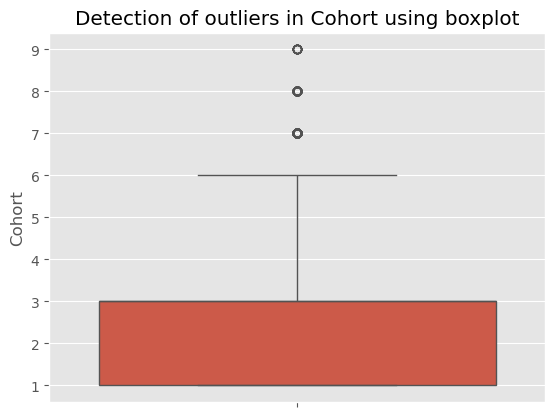

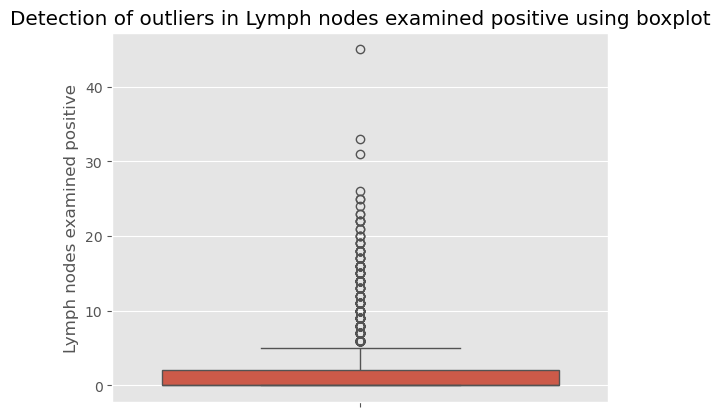

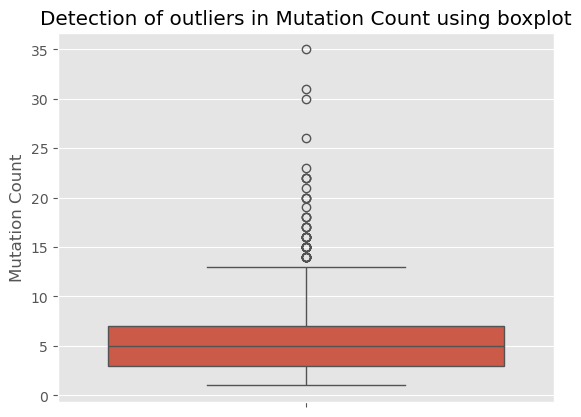

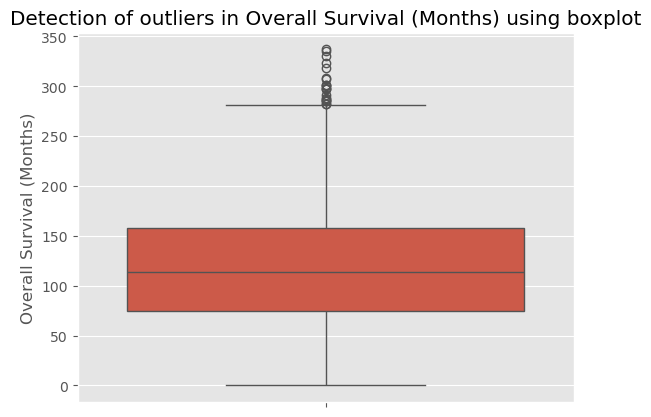

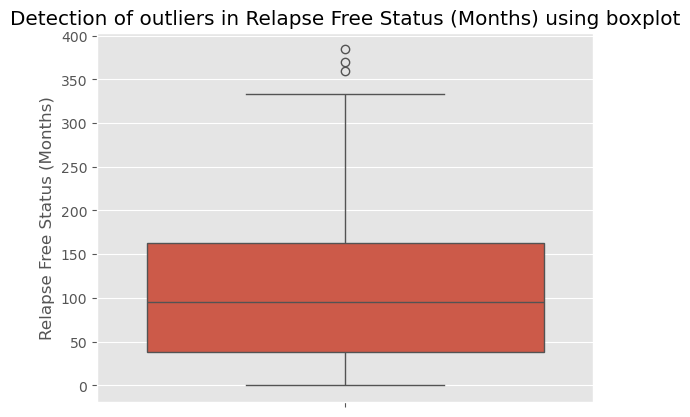

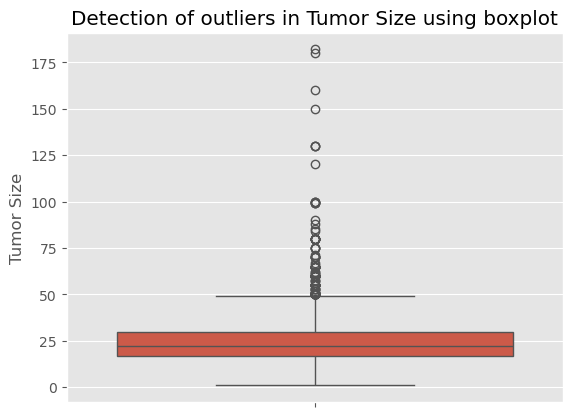

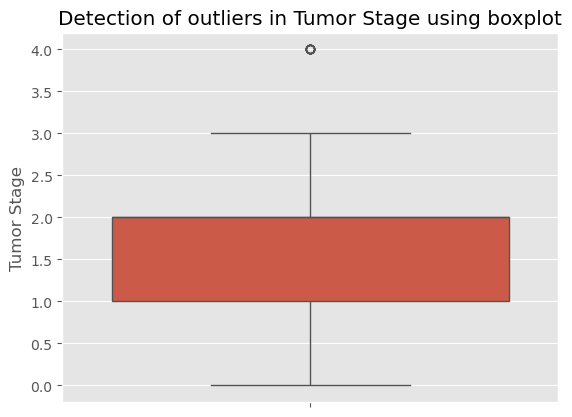

In [460]:
# now let's detect outliers in the numerical columns
num_col_handled = ['Cohort','Lymph nodes examined positive', 'Mutation Count',
            'Overall Survival (Months)','Relapse Free Status (Months)', 'Tumor Size','Tumor Stage']
for col in num_col_handled:
    plt.style.use("ggplot")
    sns.boxplot(df_cleaned[col])
    plt.title("Detection of outliers in {} using boxplot".format(col))
    plt.show()

In [462]:
for series in num_col_handled:
    Q1 = df_cleaned[series].quantile(0.25)
    Q3 = df_cleaned[series].quantile(0.75)
    multiplier = 1.5
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

In [464]:
def handle_outliers(num_col_handled, method='cap', lower_cap=None, upper_cap=None):
        if method == 'cap':
            # Treat outliers by capping
            if lower_cap is not None:
                num_col_handled = num_col_handled.apply(lambda x: lower_cap if x < lower_cap else x)
            if upper_cap is not None:
                num_col_handled = num_col_handled.apply(lambda x: upper_cap if x > upper_cap else x)
        elif method == 'log':
            # Treat outliers by logarithmic transformation
            num_col_handled = np.log1p(num_col_handled)
        elif method == 'sqrt':
            # Treat outliers by square root transformation
            num_col_handled = np.sqrt(num_col_handled)
        # Add more methods as needed
        return num_col_handled

In [466]:
df_cleaned['Cohort_log'] = handle_outliers(df_cleaned['Cohort'], method='log')

df_cleaned['Lymph nodes examined positive_log'] = handle_outliers(df_cleaned['Lymph nodes examined positive'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Lymph nodes examined positive_cap'] = handle_outliers(df['Lymph nodes examined positive'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)

df_cleaned['Mutation Count_log'] = handle_outliers(df_cleaned['Mutation Count'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Mutation Count_cap'] = handle_outliers(df['Mutation Count'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Mutation Count_sqrt'] = handle_outliers(df['Mutation Count'], method='sqrt', lower_cap=lower_bound, upper_cap=upper_bound)

df_cleaned['Overall Survival (Months)_log'] = handle_outliers(df_cleaned['Overall Survival (Months)'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Overall Survival (Months)_cap'] = handle_outliers(df['Overall Survival (Months)'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Overall Survival (Months)_sqrt'] = handle_outliers(df['Overall Survival (Months)'], method='sqrt', lower_cap=lower_bound, upper_cap=upper_bound)

df_cleaned['Relapse Free Status (Months)_log'] = handle_outliers(df_cleaned['Relapse Free Status (Months)'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Relapse Free Status (Months)_cap'] = handle_outliers(df['Relapse Free Status (Months)'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Relapse Free Status (Months)_sqrt'] = handle_outliers(df['Relapse Free Status (Months)'], method='sqrt', lower_cap=lower_bound, upper_cap=upper_bound)

#df['Tumor Size_log'] = handle_outliers(df['Tumor Size'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
df_cleaned['Tumor Size_cap'] = handle_outliers(df_cleaned['Tumor Size'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Tumor Size_sqrt'] = handle_outliers(df['Tumor Size'], method='sqrt', lower_cap=lower_bound, upper_cap=upper_bound)

df_cleaned['Tumor Stage_log'] = handle_outliers(df_cleaned['Tumor Stage'], method='log', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Tumor Stage_cap'] = handle_outliers(df['Tumor Stage'], method='cap', lower_cap=lower_bound, upper_cap=upper_bound)
#df['Tumor Stage_sqrt'] = handle_outliers(df['Tumor Stage'], method='sqrt', lower_cap=lower_bound, upper_cap=upper_bound)

In [468]:
num_col = ['Cohort_log','Lymph nodes examined positive_log','Mutation Count_log','Overall Survival (Months)_log',
         'Relapse Free Status (Months)_log','Tumor Size_cap','Tumor Stage_log']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned[num_col].quantile(0.25)
Q3 = df_cleaned[num_col].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
outliers_condition = ((df_cleaned[num_col] < (Q1 - 1.5 * IQR)) | (df_cleaned[num_col] > (Q3 + 1.5 * IQR)))

# Count the number of outliers per feature
outliers_count_specified = outliers_condition.sum()
outliers_count_specified

Cohort_log                             0
Lymph nodes examined positive_log     50
Mutation Count_log                     8
Overall Survival (Months)_log        122
Relapse Free Status (Months)_log      30
Tumor Size_cap                        18
Tumor Stage_log                        4
dtype: int64

In [470]:
# Dropping multiple columns from the DataFrame
df_cleaned.drop(columns=['Cohort','Lymph nodes examined positive', 'Mutation Count', 'Overall Survival (Months)_log',
                 'Relapse Free Status (Months)', 'Tumor Size','Tumor Stage'], inplace=True)

# Step 8 | Modify the Data Type

In [472]:
df_cleaned['Tumor Stage_log'] = df_cleaned['Tumor Stage_log'].astype('object')
df_cleaned['Neoplasm Histologic Grade'] = df_cleaned['Neoplasm Histologic Grade'].astype('object')

# Step 9: Perform Exploratory Data Analysis (EDA)
In this step, we analyze and visualize the dataset to understand its structure, detect patterns.
**Univariate Analysis**
***Numerical Variables Univariate Analysis***

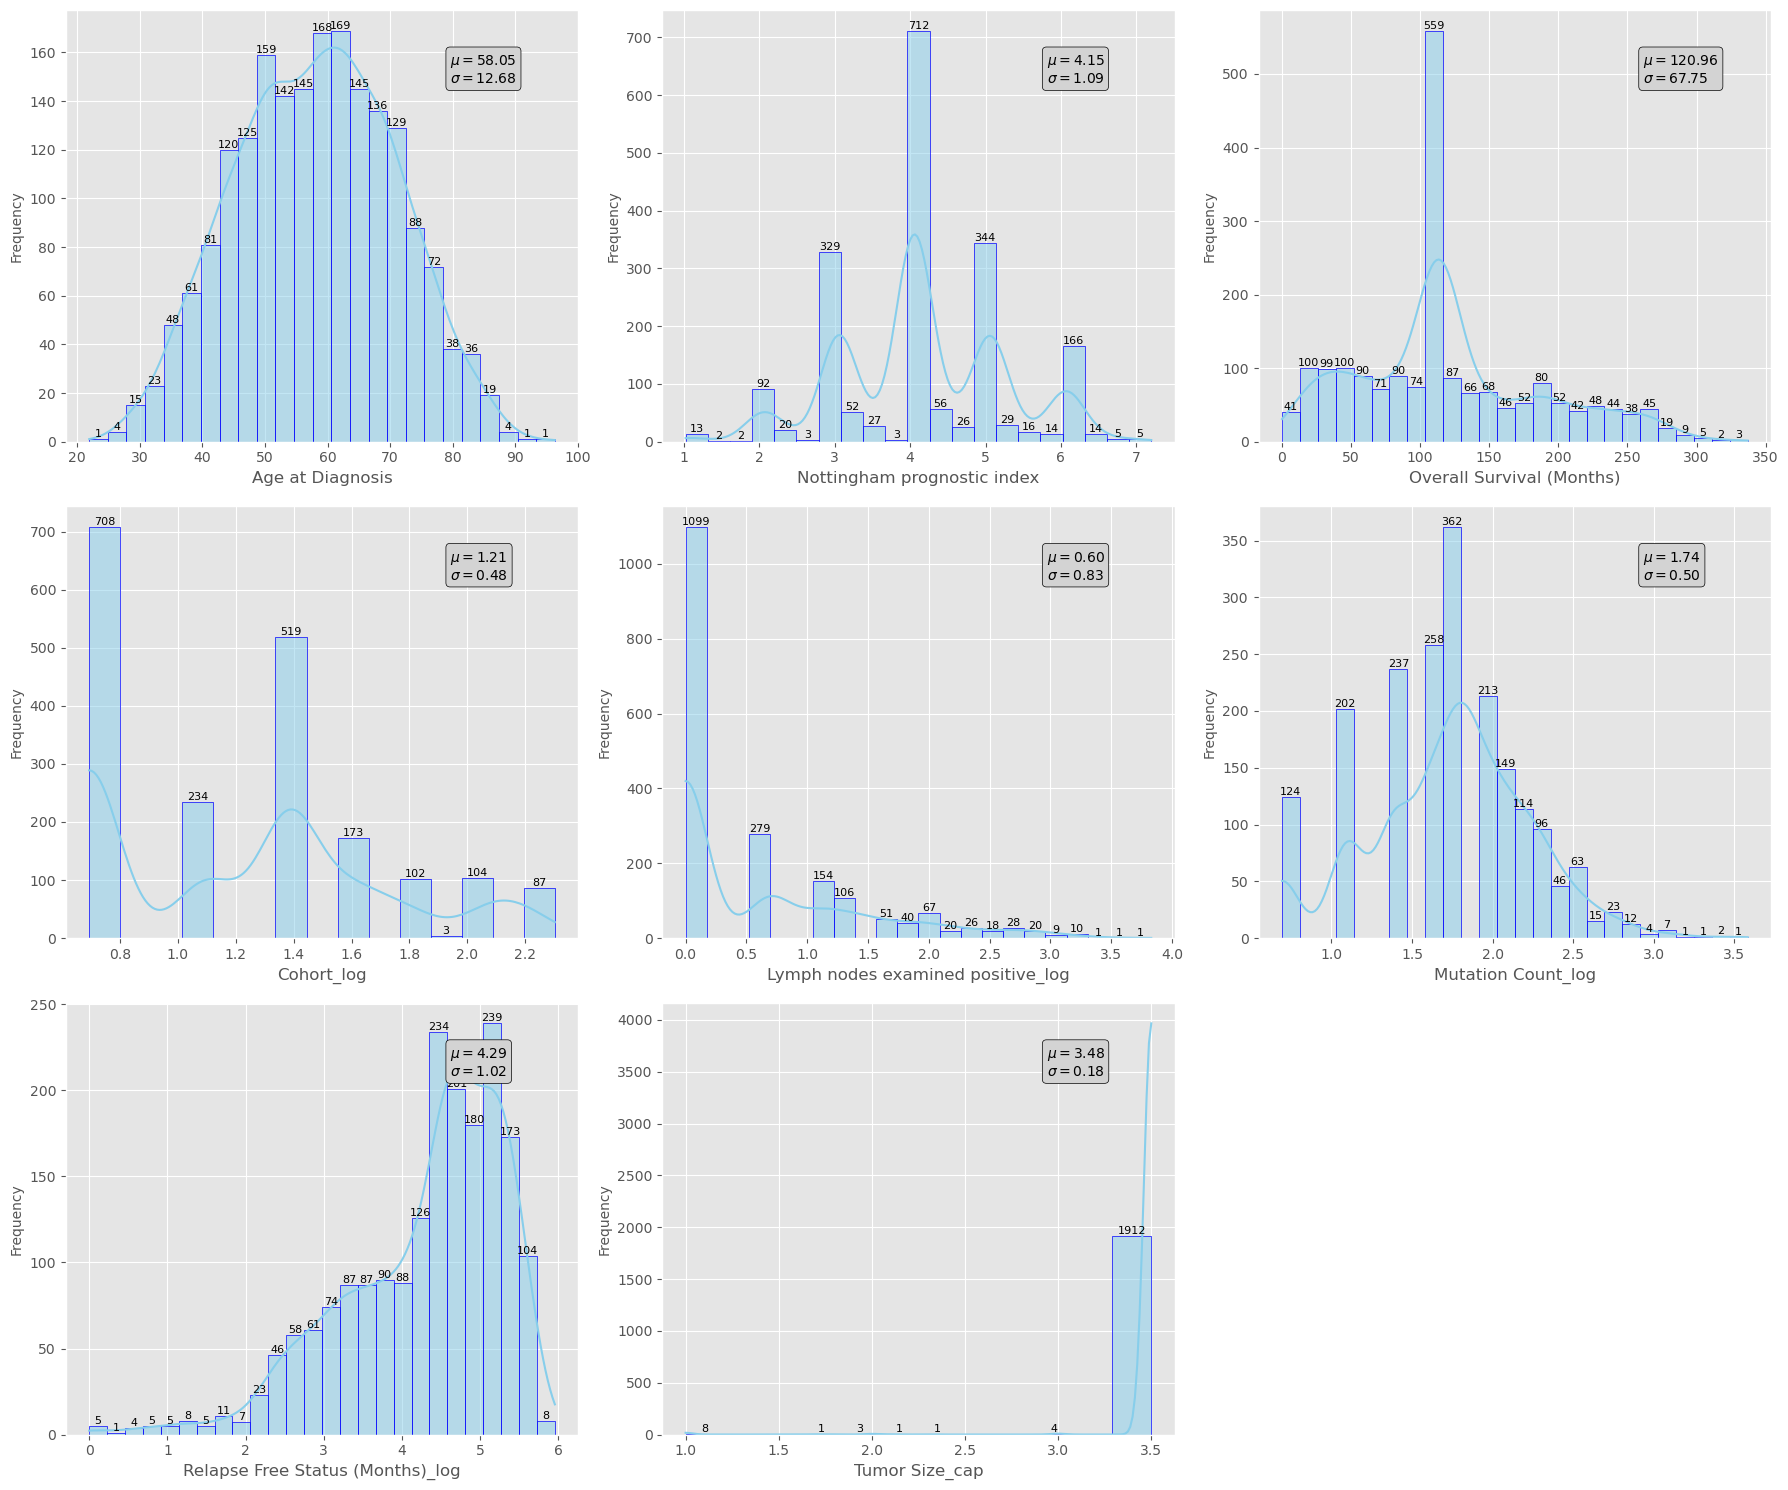

In [474]:
# Set a default font family
#plt.rcParams['font.family'] = 'sans-serif'  # or use another font like 'serif', 'monospace', etc.
#plt.rcParams['font.sans-serif'] = ['Arial']  # Specify a font that you know is available

# Filter continuous features
continuous_features = df_cleaned.select_dtypes(include=[np.number])

# Set up the subplot grid
n_features = len(continuous_features.columns)
nrows = (n_features + 2) // 3  # Number of rows needed
fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(18, nrows * 5))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Plot histograms with KDE and annotations
for i, col in enumerate(continuous_features.columns):
    # Plot histogram and KDE without edge color
    graph = sns.histplot(data=continuous_features, x=col, kde=True, ax=ax[i], color='skyblue', edgecolor='blue')

    # Set labels
    ax[i].set_xlabel(col, fontsize=12)
    ax[i].set_ylabel('Frequency',fontsize=10)
    ax[i].grid(True)

    # Annotate bars with frequencies
    for p in graph.patches:
        height = p.get_height()
        if height > 0:
            ax[i].annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2, height),
                           ha='center', va='bottom', fontsize=8)

    # Display mean and standard deviation
    mean = continuous_features[col].mean()
    std_dev = continuous_features[col].std()
    textstr = f'$\mu={mean:.2f}$\n$\sigma={std_dev:.2f}$'
    ax[i].text(0.75, 0.9, textstr, transform=ax[i].transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgrey', edgecolor='black'))

# Turn off any unused subplots
for i in range(n_features, len(ax)):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Categorical Variables Univariate Analysis**

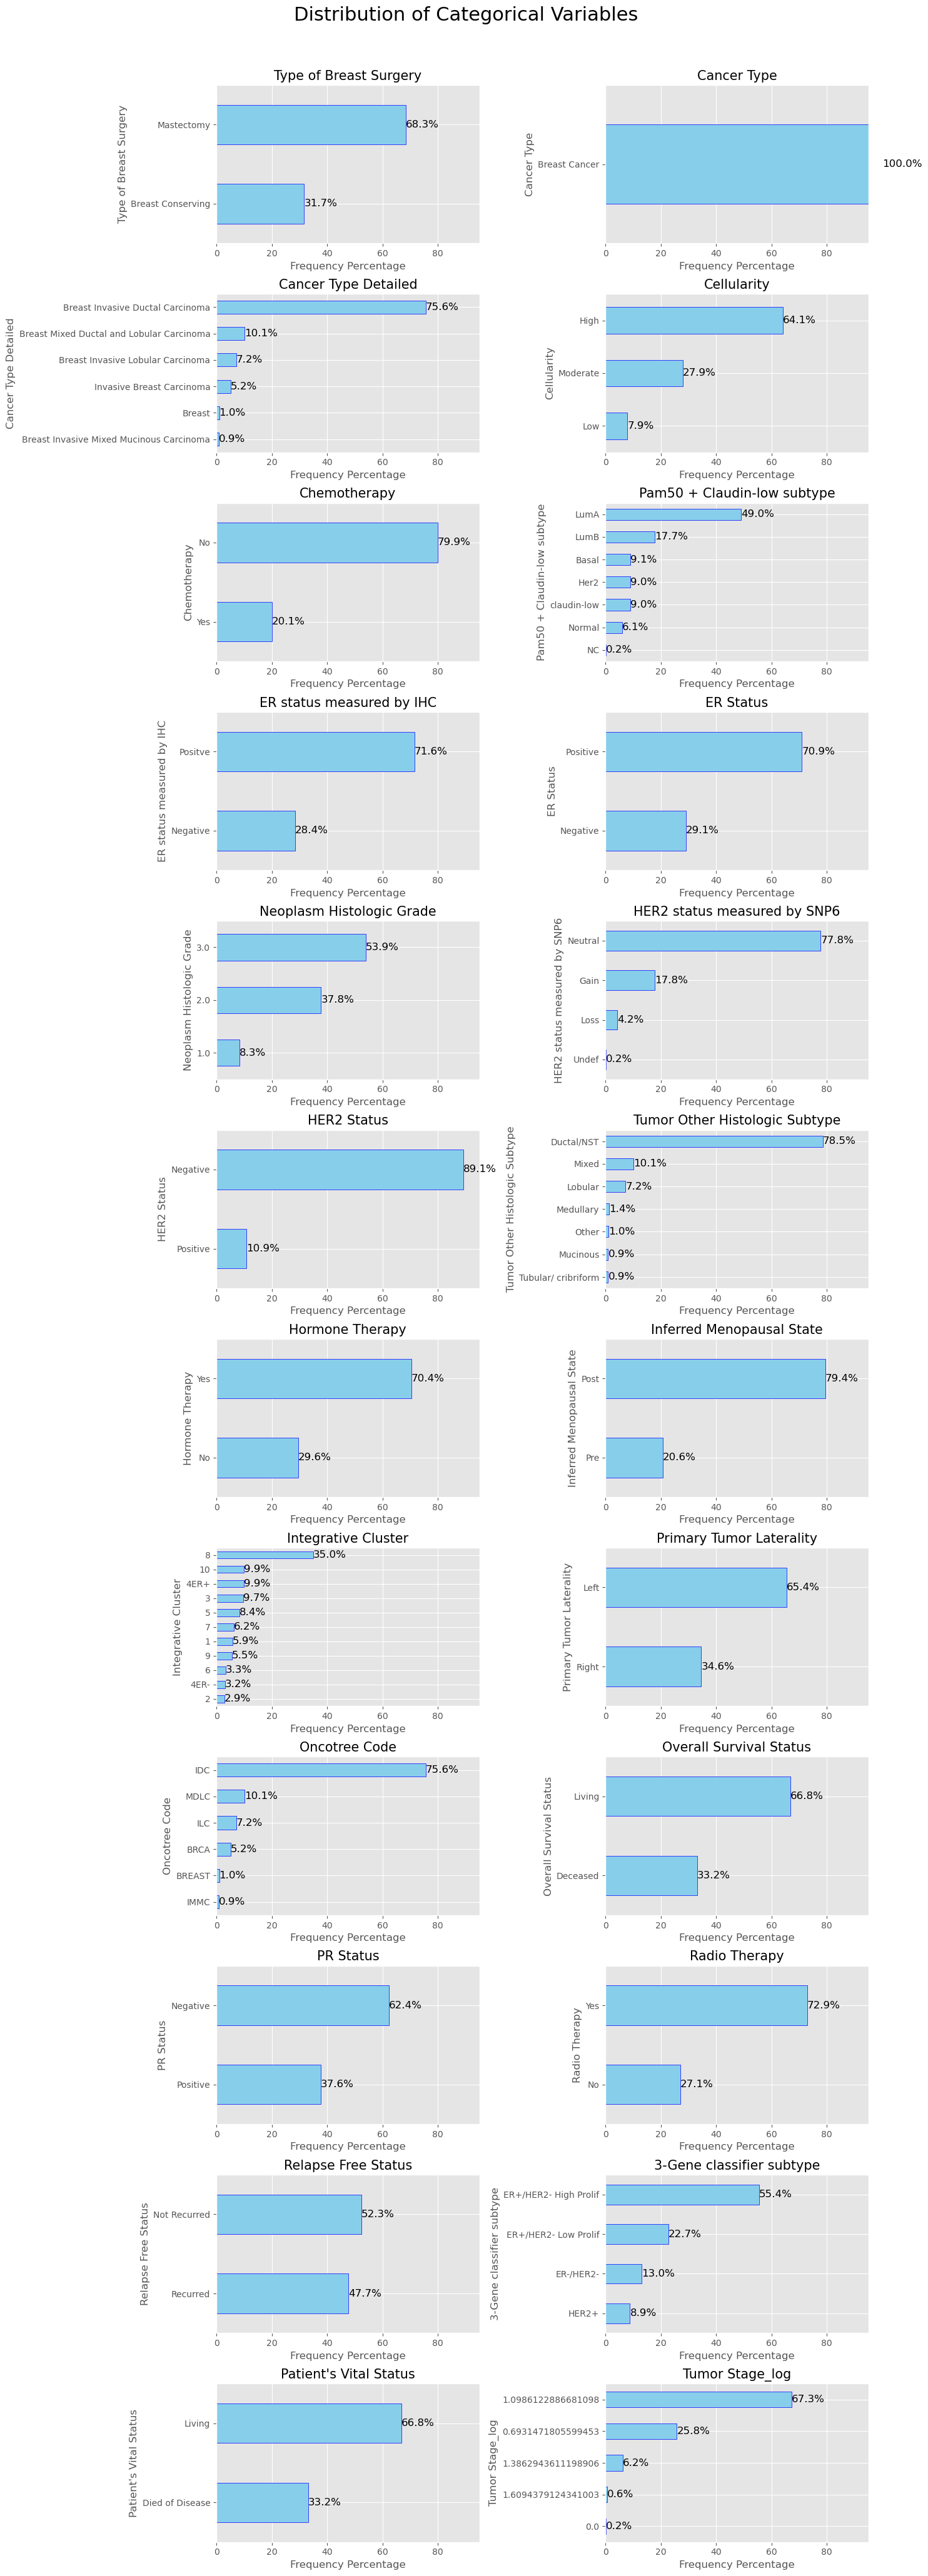

In [476]:
# Select categorical features
categorical_features = df_cleaned.select_dtypes(include=[object]).columns

# Determine the number of rows needed
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  # Calculates the required rows

# Set up the subplot with a dynamic number of rows
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3.5))

ax = ax.flatten()  # Flatten the array to simplify indexing

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(categorical_features):
    # Calculate frequency percentages
    value_counts = df_cleaned[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.5, color='skyblue', edgecolor='blue')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, str(round(value, 1)) + '%', fontsize=12, va='center')

    ax[i].set_xlim([0, 95])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=15)

# Hide any unused subplots if there are fewer than 10 categorical features
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Bivariate Analysis
 **Numerical Features vs Target**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

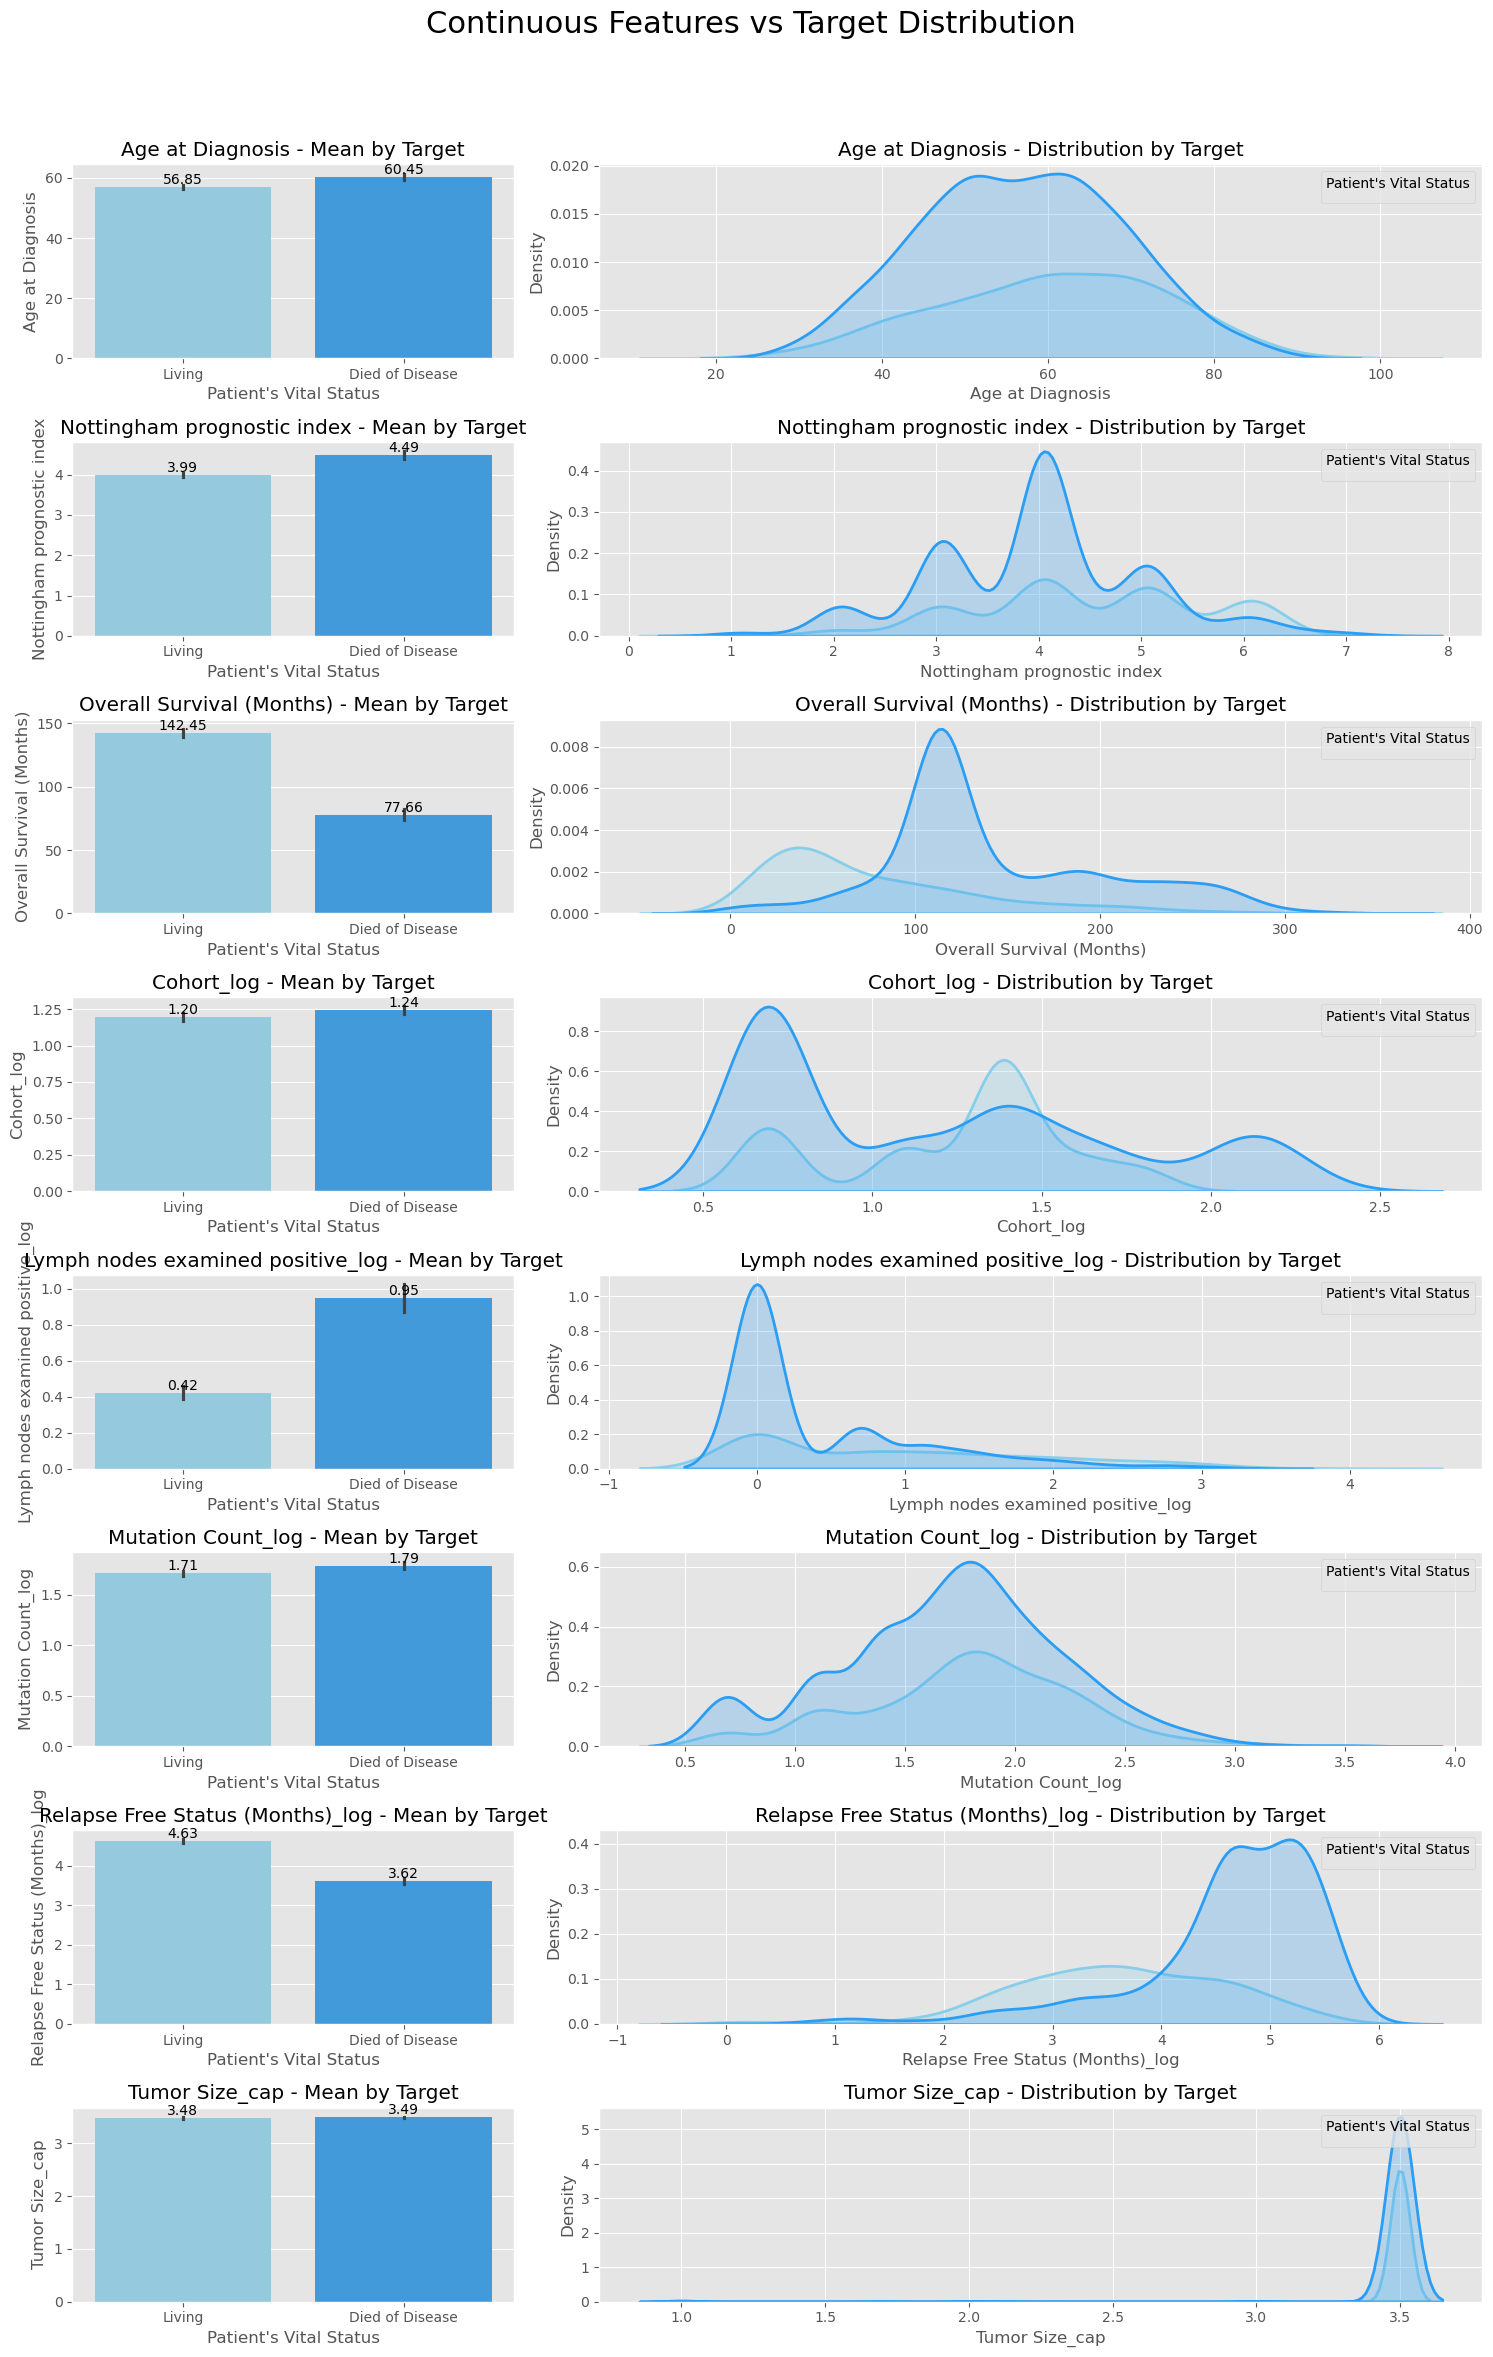

In [478]:
# Ensure continuous_features is correctly defined
continuous_features = df_cleaned.select_dtypes(include=[np.number]).columns

# Create the subplots with appropriate dimensions
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15, len(continuous_features) * 3),
                       gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and KDE plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    sns.barplot(data=df_cleaned, x="Patient\'s Vital Status", y=col, ax=ax[i, 0], palette=['skyblue', '#2a9df4'])
    ax[i, 0].set_xlabel('Patient\'s Vital Status')
    ax[i, 0].set_ylabel(col)
    ax[i, 0].set_title(f'{col} - Mean by Target')

    # Add mean values to the barplot
    for container in ax[i, 0].containers:
        ax[i, 0].bar_label(container, fmt='%.2f')

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df_cleaned, x=col, hue='Patient\'s Vital Status', fill=True, linewidth=2, ax=ax[i, 1],palette=['#2a9df4','skyblue'])

    ax[i, 1].set_xlabel(col)
    ax[i, 1].set_title(f'{col} - Distribution by Target')
    ax[i, 1].legend(title="Patient\'s Vital Status")

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

# Categorical Features vs Target

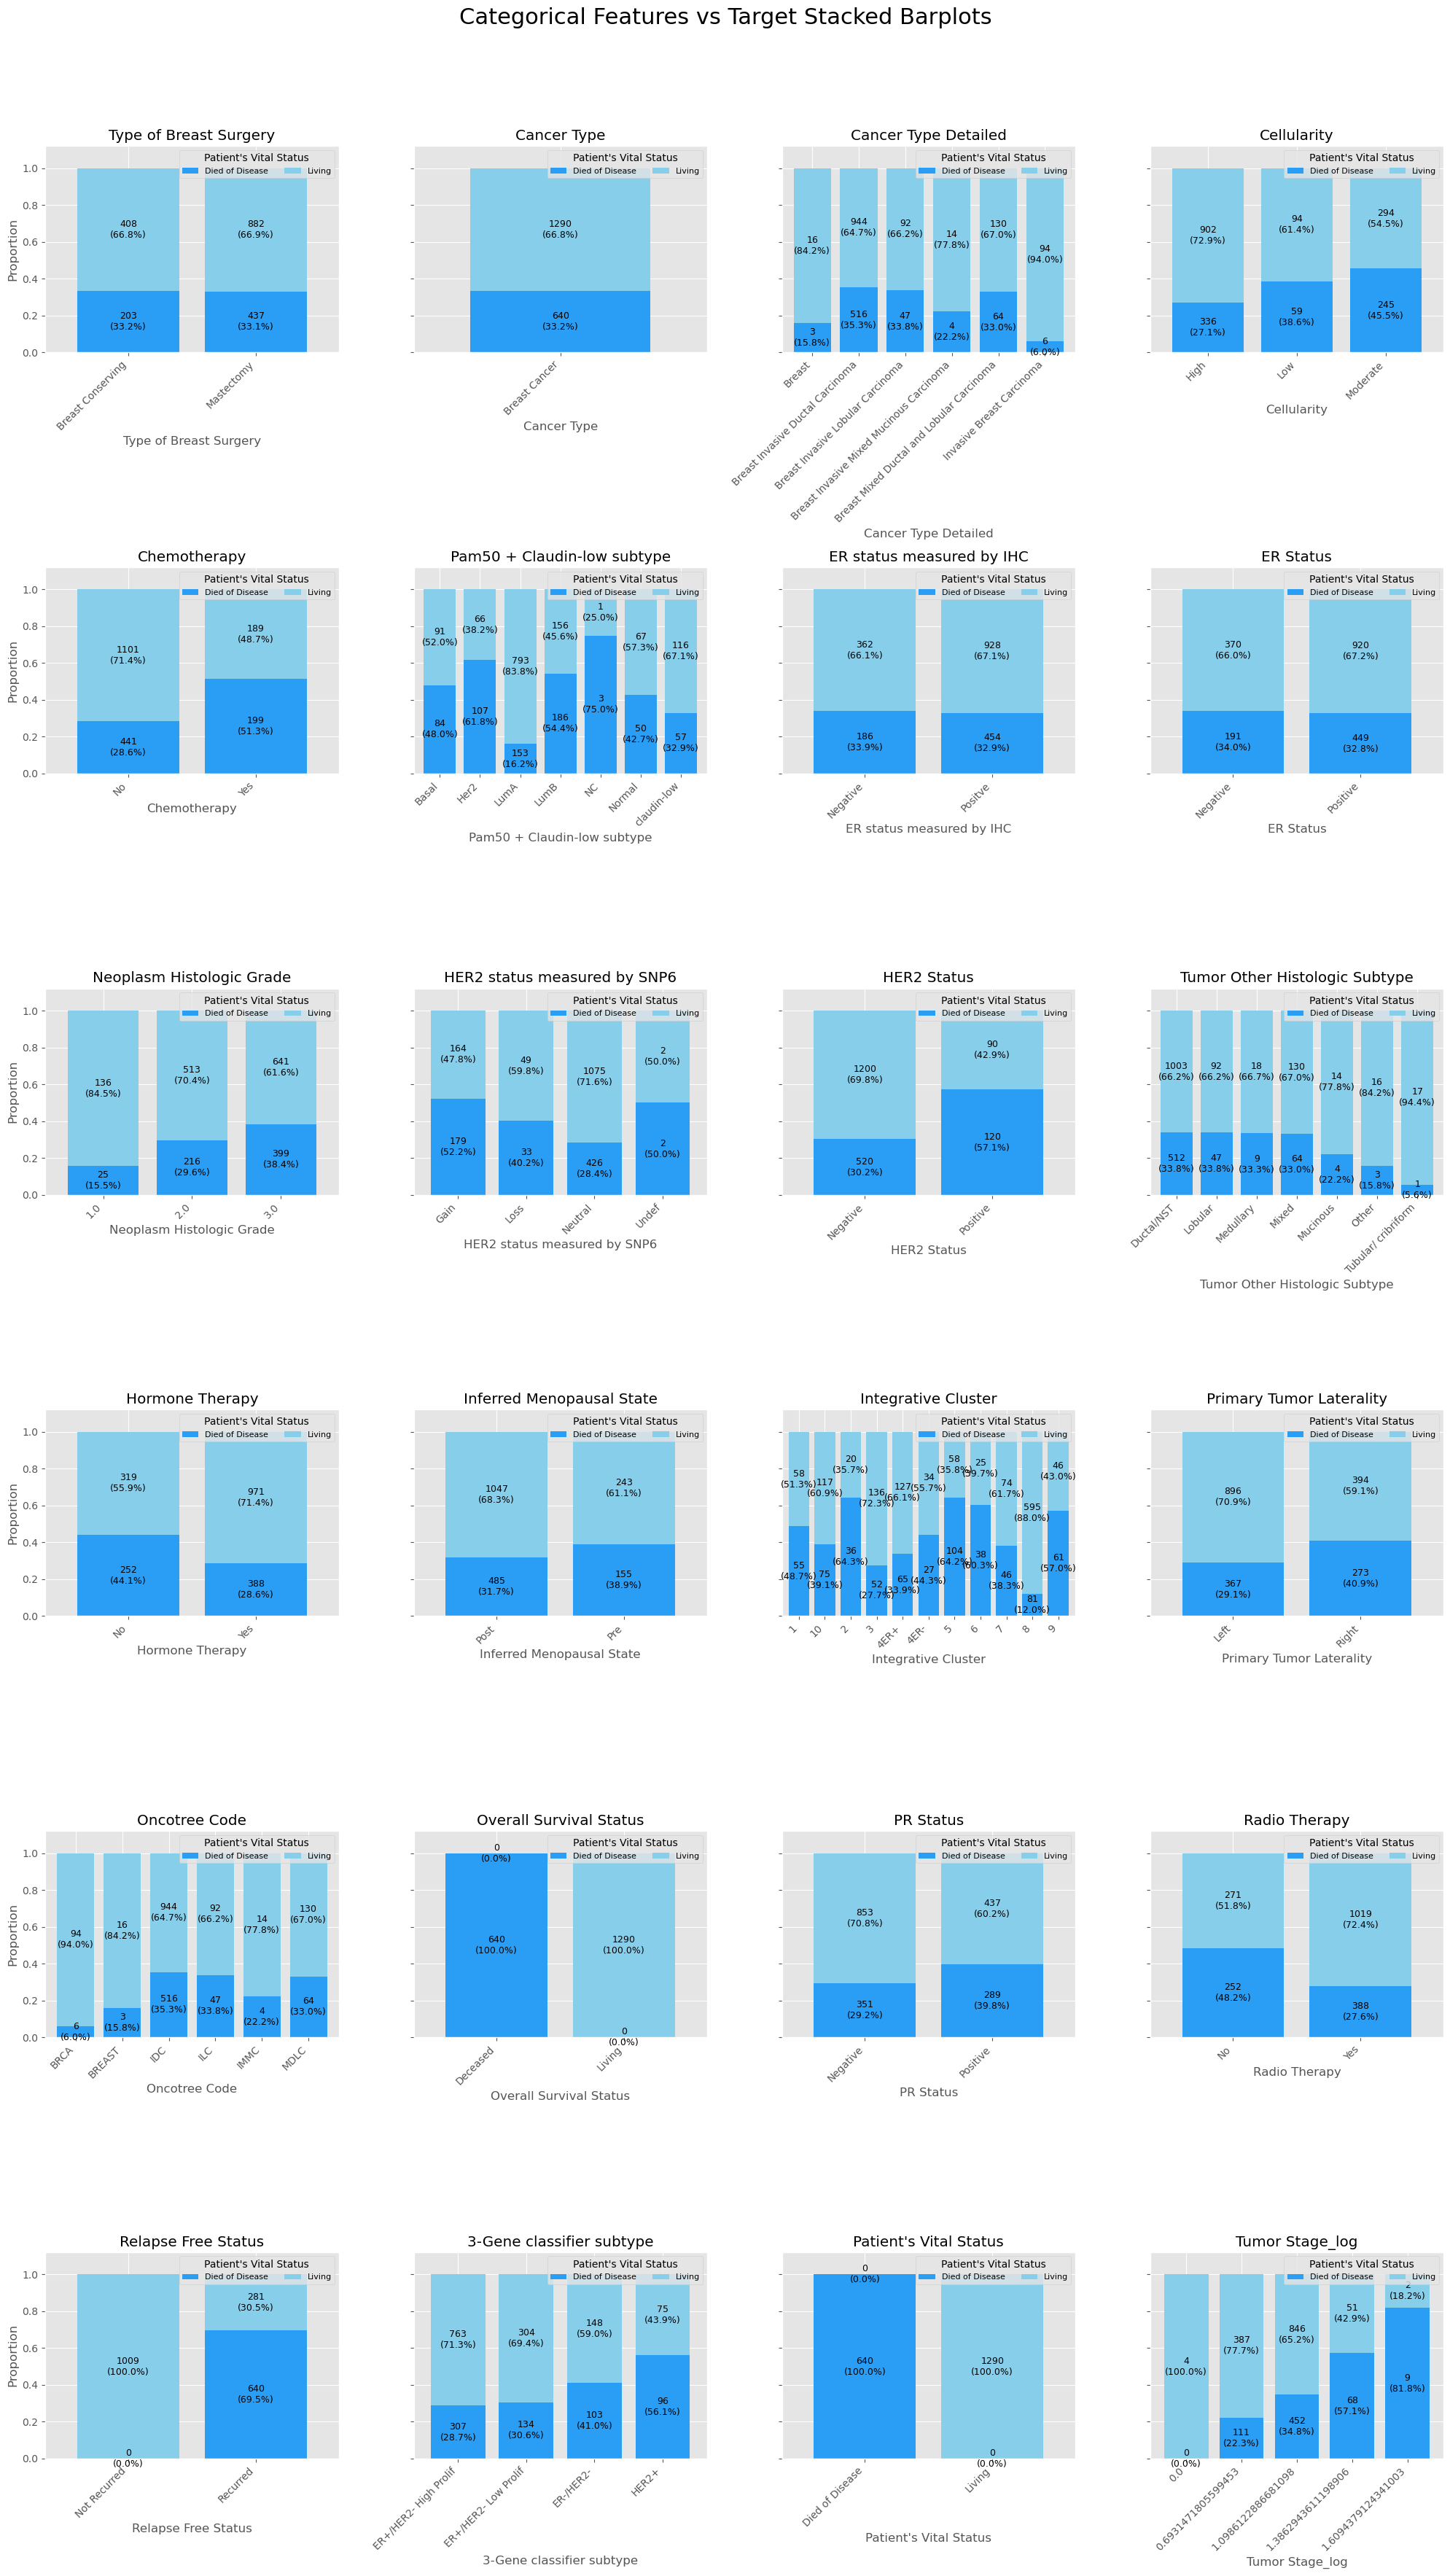

In [479]:
# Define categorical features and ensure df is defined
categorical_features = [feature for feature in df_cleaned.select_dtypes(include=['object']).columns if feature != 'target']

# Calculate the number of rows and columns needed for subplots
n_features = len(categorical_features)
ncols = 4
nrows = (n_features + ncols - 1) // ncols  # Calculate the number of rows needed

# Create the subplots with the calculated dimensions
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 6))

# Flatten axes array for easy iteration
ax = ax.flatten()

for i, col in enumerate(categorical_features):
    # Create a cross-tabulation showing the proportion of target categories for each category of the feature
    cross_tab = pd.crosstab(index=df_cleaned[col], columns=df_cleaned['Patient\'s Vital Status'])
    cross_tab_prop = pd.crosstab(index=df_cleaned[col], columns=df_cleaned['Patient\'s Vital Status'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#2a9df4','skyblue'])

    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to the plot
    for idx, val in enumerate(cross_tab.index):
        cumulative = 0
        for status in cross_tab.columns:
            count = cross_tab.loc[val, status]
            proportion = cross_tab_prop.loc[val, status]
            cumulative += proportion
            ax[i].text(idx, cumulative - proportion / 2,
                       f'{count}\n({proportion:.1%})',
                       ha='center', va='center', fontsize=9)

    # Add legend
    ax[i].legend(title='Patient\'s Vital Status', loc='best', fontsize=8, ncol=2)
    # Set y limit
    ax[i].set_ylim([0, 1.12])
    # Rotate xticks
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    ax[i].set_title(col)  # Add title to each subplot

# Turn off any unused subplots
for i in range(len(categorical_features), len(ax)):
    ax[i].axis('off')

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

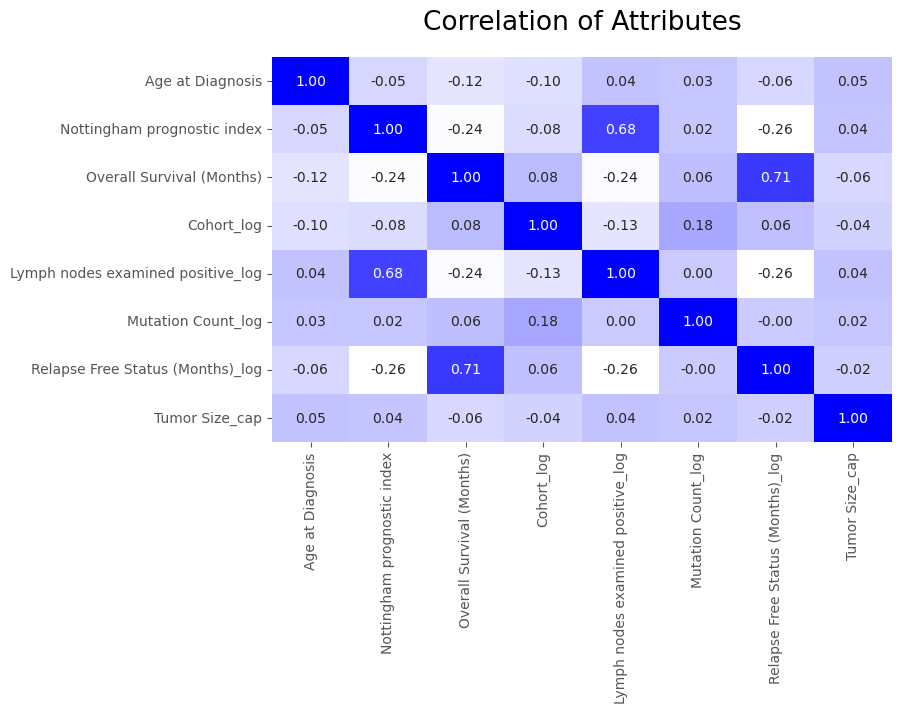

In [180]:
import matplotlib.colors as mcolors

numerical_df = df_cleaned.select_dtypes(include=[np.number])

# Create a colormap that ranges from white to a single color (e.g., blue)
cmap = mcolors.LinearSegmentedColormap.from_list('blue_shades', ['white', 'blue'])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numerical_df.corr(), cmap=cmap, annot=True, fmt='.2f', cbar=False)
plt.title('Correlation of Attributes', y=1.05, size=19)
plt.show()

# Step 10 : Separate the target variable from the feature variables.

In [482]:
#make target
df_target = df_cleaned["Patient's Vital Status"]
#df_target =df['Overall Survival Status']

#remove data leakage and target variables and make features
df_feature =df_cleaned.drop(columns=["Overall Survival Status","Patient's Vital Status"],axis=1)

# Step 11 : Transform the Categorical Features into Dummy Variables

In [484]:
categorical_columns = df_feature.select_dtypes(include=['object','category']).columns.tolist()

#make dummy datafram for catagorical columns
dummy_var=pd.get_dummies(data=df_feature,columns=categorical_columns,drop_first=True,dtype='int8')

# Step 12 : Standardize the Feature Values

In [486]:
numerical_columns = df_feature.select_dtypes(include=[np.number])

# we will be scaling the numerical columns directly while running the model.

#x_scaler=StandardScaler()
#num_scaled=x_scaler.fit_transform(numerical_columns)
#x_num_scaled=pd.DataFrame(num_scaled,columns=numerical_columns.columns)

In [488]:
X=pd.concat([numerical_columns,dummy_var],axis=1)
#X=pd.concat([x_num_scaled,dummy_var],axis=1)

# Step 13 : Partition the Data into Training and Testing Sets

In [490]:
X_train,X_test,y_train,y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

In [492]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1544, 73)
(386, 73)
(1544,)
(386,)


# Classic Model

In [495]:
#make 5fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def classic_model(model, kfold, X_train, X_test, y_train, y_test, name):
    label_encoder = LabelEncoder()
    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Encode target variable
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    model.fit(X_train, y_train_encoded)
    test_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    test_pred_encoded = model.predict(X_test)

    # Decode predictions
    test_pred = label_encoder.inverse_transform(test_pred_encoded)

    train_score = model.score(X_train, y_train_encoded)

    # Metrics
    results = cross_val_score(model, X_train, y_train_encoded, cv=kfold)
    print(name)
    print("CV scores: ", results)
    print("CV Standard Deviation: ", results.std())
    print('CV Mean score: ', results.mean())
    print('Train score:   ', model.score(X_train, y_train_encoded))
    print('Test score:    ', model.score(X_test, y_test_encoded))

    # ROC-AUC
    auc_score = roc_auc_score(y_test_encoded, test_pred_prob)
    fpr, tpr, _ = roc_curve(y_test_encoded, test_pred_prob)

    print('ROC-AUC Score: ', auc_score)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, test_pred)

    # Create figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))  # Adjusted figsize for smaller plots

    # ROC Curve
    ax[0].plot(fpr, tpr, marker='.')
    ax[0].set_title(f'ROC Curve for {name}', fontsize=10)
    ax[0].set_xlabel('False Positive Rate', fontsize=10)
    ax[0].set_ylabel('True Positive Rate', fontsize=10)
    ax[0].grid(True)

    # Confusion Matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1],
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'],
                annot_kws={"size": 14})  # Adjust annotation size
    ax[1].set_title('Confusion Matrix', fontsize=10)
    ax[1].set_xlabel('Predicted', fontsize=10)
    ax[1].set_ylabel('Actual', fontsize=10)

    # Show plots
    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nClassification Report:  ")
    print(classification_report(y_test, test_pred))
    #classification_rep = classification_report(y_test, test_pred)

    #return test_pred, model.score(X_test, y_test_encoded), results.mean(), auc_score
    return test_pred, model.score(X_test, y_test_encoded), train_score, results.mean(), auc_score

In [497]:
model_results = {
    'Model': [],
    'Train Score': [],
    'Test Score': [],
    'CV Mean Score': [],
    'ROC-AUC Score': []
}

# LogisticRegression

Best parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2'}
Best ROC-AUC score for Logistic Regression:  0.990939295042595
Best Logistic Regression
CV scores:  [0.98058252 0.95145631 0.94822006 0.92880259 0.94805195]
CV Standard Deviation:  0.016634811357157404
CV Mean score:  0.9514226873450173
Train score:    0.9656735751295337
Test score:     0.9689119170984456
ROC-AUC Score:  0.9914847647189655


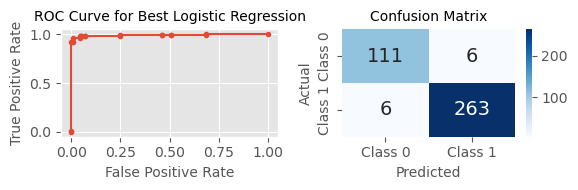


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.95      0.95      0.95       117
         Living       0.98      0.98      0.98       269

       accuracy                           0.97       386
      macro avg       0.96      0.96      0.96       386
   weighted avg       0.97      0.97      0.97       386



In [501]:
# Define the parameter grid for Logistic Regression
#logistic_param_grid = {
#    'penalty': ['l1', 'l2'],  # Regularization type
#    'C': [1e-15,1e-14,1e-13,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,0.0001,0.001,0.01, 0.1, 1,1.2,1.3,1.5, 10, 100],  # Inverse of regularization strength}

logistic_param_grid = {'C':[ 1], 'penalty': ['l2']}

# Create GridSearchCV object for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                     param_grid=logistic_param_grid,
                                     cv=kfold,
                                     scoring='roc_auc',  # Score based on ROC-AUC
                                     n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
logistic_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters for Logistic Regression: ", logistic_grid_search.best_params_)
print("Best ROC-AUC score for Logistic Regression: ", logistic_grid_search.best_score_)

# Get the best model
logistic_model = logistic_grid_search.best_estimator_

# Evaluate the best model
logistic_test_pred, logistic_test_score, logistic_train_score,logistic_cv_score, logistic_auc_score = classic_model(logistic_model, kfold, X_train, X_test, y_train, y_test, "Best Logistic Regression")

Top features selected by RFE:
['Cellularity_Moderate', 'Pam50 + Claudin-low subtype_Her2', 'Pam50 + Claudin-low subtype_LumA', 'Pam50 + Claudin-low subtype_Normal', 'Tumor Other Histologic Subtype_Mucinous', 'Integrative Cluster_6', 'Integrative Cluster_8', 'Radio Therapy_Yes', 'Relapse Free Status_Recurred', 'Tumor Stage_log_0.6931471805599453']


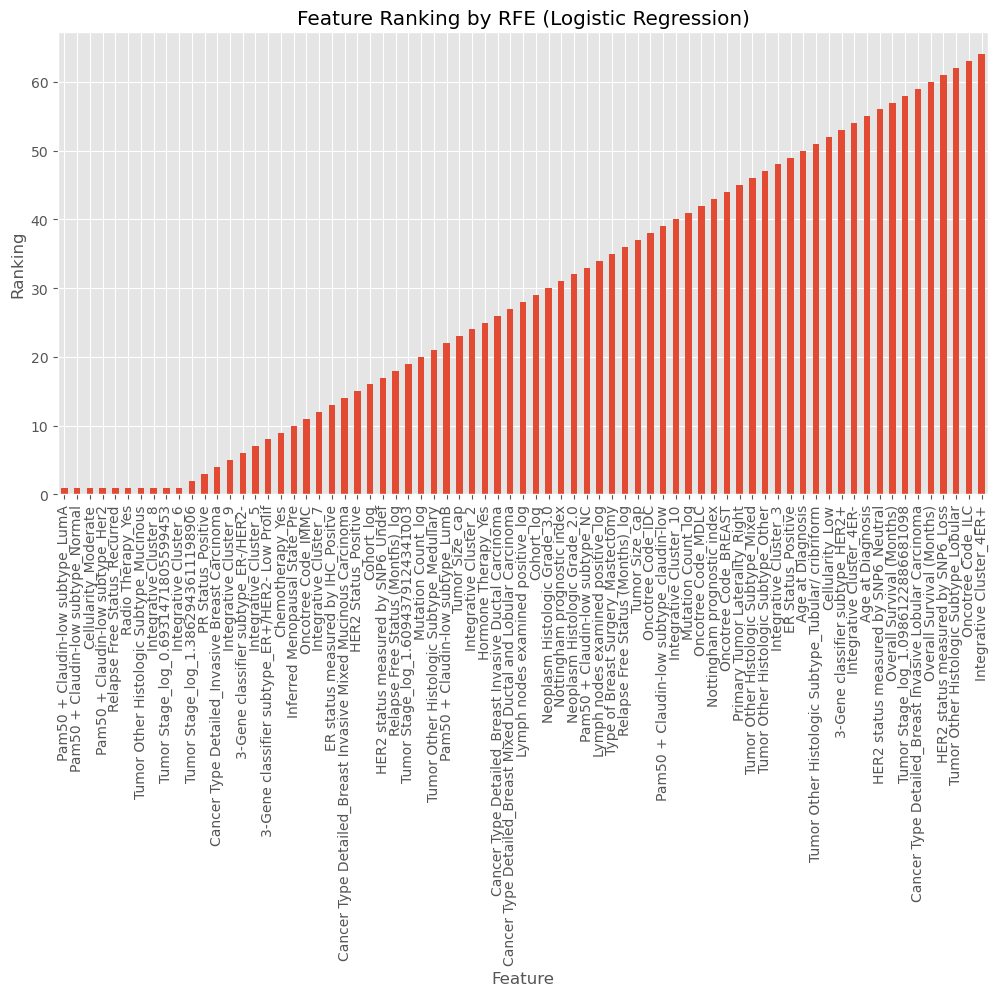

In [503]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the RFE object and rank features
rfe = RFE(estimator=lr_model, n_features_to_select=10)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Get the ranking of features
rfe_ranking = pd.Series(rfe.ranking_, index=X_train.columns)

# Select the top features
top_features = rfe_ranking[rfe_ranking == 1].index.tolist()

# Display the ranking
print("Top features selected by RFE:")
print(top_features)

# Plot the feature rankings
plt.figure(figsize=(12, 6))
rfe_ranking.sort_values().plot(kind='bar')
plt.title('Feature Ranking by RFE (Logistic Regression)')
plt.ylabel('Ranking')
plt.xlabel('Feature')
plt.show()

In [505]:
#df_rf_feature=df_feature.drop(columns=['Tumor Other Histologic Subtype','ER status measured by IHC'],axis=1)
df_rf_feature=df_feature.drop(columns=['Radio Therapy'],axis=1)
#df[
categorical_rf_columns = df_rf_feature.select_dtypes(include=['object']).columns.tolist()

#make dummy datafram for catagorical columns
dummy_rf_var=pd.get_dummies(data=df_rf_feature,columns=categorical_rf_columns,drop_first=True,dtype='int8')

numerical_rf_columns = df_rf_feature.select_dtypes(include=[np.number])

X_rf=pd.concat([numerical_rf_columns,dummy_rf_var],axis=1)
X_train_logistic,X_test_logistic,y_train_logistic,y_test_logistic = train_test_split(X_rf, df_target, random_state = 10, test_size = 0.2)

Best parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2'}
Best ROC-AUC score for Logistic Regression:  0.9896172853131248
Best Logistic Regression
CV scores:  [0.97411003 0.94498382 0.9579288  0.93203883 0.9512987 ]
CV Standard Deviation:  0.013943780067526943
CV Mean score:  0.9520720379943681
Train score:    0.9656735751295337
Test score:     0.9740932642487047
ROC-AUC Score:  0.9896419152924728


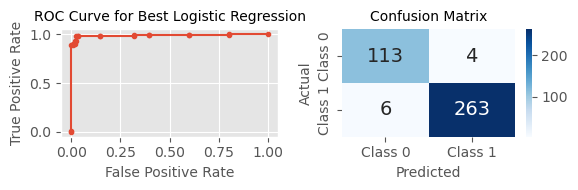


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.95      0.97      0.96       117
         Living       0.99      0.98      0.98       269

       accuracy                           0.97       386
      macro avg       0.97      0.97      0.97       386
   weighted avg       0.97      0.97      0.97       386



In [507]:
# Define the parameter grid for Logistic Regression
#logistic_param_grid = {
#    'penalty': ['l1', 'l2'],
#    'C': [1e-15,1e-14,1e-13,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,0.0001,0.001,0.01, 0.1, 1,1.2,1.3,1.5, 10, 100]}  # Inverse of regularization strength}

logistic_param_grid = {'C':[ 1], 'penalty': ['l2']}

# Create GridSearchCV object for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                     param_grid=logistic_param_grid,
                                     cv=kfold,
                                     scoring='roc_auc',  # Score based on ROC-AUC
                                     n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
logistic_grid_search.fit(X_train_logistic, y_train_logistic)

# Get the best parameters and the best score
print("Best parameters for Logistic Regression: ", logistic_grid_search.best_params_)
print("Best ROC-AUC score for Logistic Regression: ", logistic_grid_search.best_score_)

# Get the best model
best_logistic_model = logistic_grid_search.best_estimator_

# Evaluate the best model
#logistic_test_pred, logistic_test_score, logistic_cv_score, logistic_auc_score = classic_model(best_logistic_model, kfold, X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic, "Best Logistic Regression")

logistic_test_pred, logistic_test_score, logistic_train_score, logistic_cv_score, logistic_auc_score = classic_model(
    best_logistic_model, kfold, X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic, "Best Logistic Regression"
)

model_results['Model'].append("Best Logistic Tree")
model_results['Train Score'].append(logistic_train_score)
model_results['Test Score'].append(logistic_test_score)
model_results['CV Mean Score'].append(logistic_cv_score)
model_results['ROC-AUC Score'].append(logistic_auc_score)
#model_results['Classification Report'].append(logistic_classification_rep)

# RandomForest

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 101}
Best ROC-AUC score for Random Forest:  0.9947018094292126
Best Random Forest
CV scores:  [0.96763754 0.95145631 0.96440129 0.95469256 0.9512987 ]
CV Standard Deviation:  0.006818686923491042
CV Mean score:  0.9578972807128145
Train score:    0.9987046632124352
Test score:     0.9715025906735751
ROC-AUC Score:  0.9961872080831189


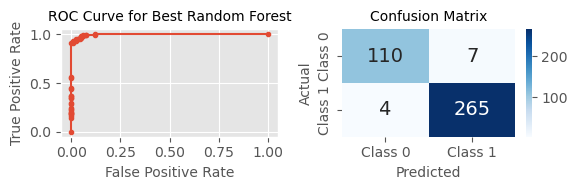


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.96      0.94      0.95       117
         Living       0.97      0.99      0.98       269

       accuracy                           0.97       386
      macro avg       0.97      0.96      0.97       386
   weighted avg       0.97      0.97      0.97       386



In [510]:
# Define the parameter grid for Random Forest
#rf_param_grid ={'criterion': ['entropy', 'gini'],
#    'n_estimators': [50, 100,101,110],
#    'max_depth': [20,22,23,40],
#    'max_features': ['sqrt', 'log2'],
#    'min_samples_split': [2,3,5],
#    'min_samples_leaf': [2,3,5],
#    'max_leaf_nodes': [None,1,3,5]}

rf_param_grid =  {'criterion': ['gini'],
                                     'max_depth': [20],
                                     'max_features': ['sqrt'],
                                     'max_leaf_nodes': [None],
                                     'min_samples_leaf':[2],
                                     'min_samples_split': [5],
                                     'n_estimators':[ 101]}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=kfold,
                              scoring='roc_auc',  # Score based on ROC-AUC
                              n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best ROC-AUC score for Random Forest: ", rf_grid_search.best_score_)

# Get the best model
rf_model = rf_grid_search.best_estimator_

# Evaluate the best model
rf_test_pred, rf_test_score, rf_train_score, rf_cv_score, rf_auc_score = classic_model(rf_model, kfold, X_train, X_test, y_train, y_test, "Best Random Forest")

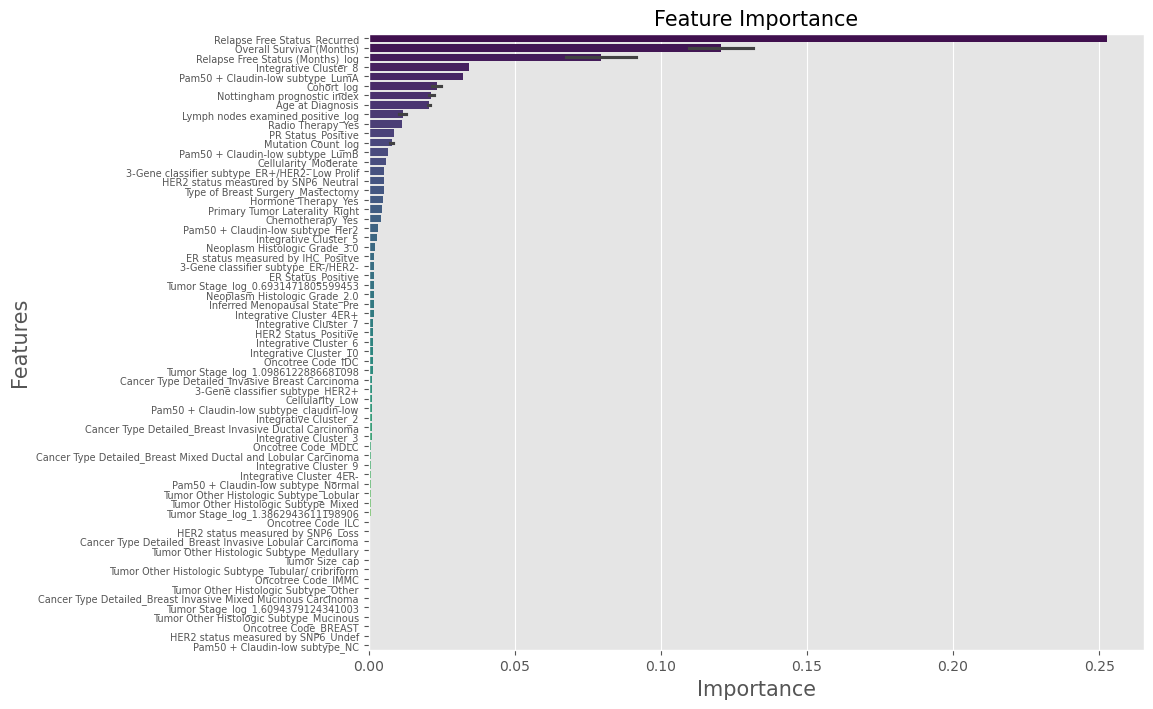

In [512]:
# Create a DataFrame to store the feature names and their importance
important_features = pd.DataFrame({
    'Features': X_train.columns,  # Feature names
    'Importance': rf_model.feature_importances_  # Feature importances
})

# Sort the DataFrame by importance in descending order
important_features = important_features.sort_values('Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Features', data=important_features, palette='viridis')

# Add plot and axes labels
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.yticks(fontsize=7)

# Display the plot
plt.show()

In [514]:
df_rf_feature=df_feature.drop(columns=['HER2 status measured by SNP6'],axis=1) #'ER status measured by IHC','Tumor Other Histologic Subtype'
#df_cleaned['HER2 status measured by SNP6'

#df_cleaned['3-Gene classifier subtype'
categorical_rf_columns = df_rf_feature.select_dtypes(include=['object']).columns.tolist()

#make dummy datafram for catagorical columns
dummy_rf_var=pd.get_dummies(data=df_rf_feature,columns=categorical_rf_columns,drop_first=True,dtype='int8')

numerical_rf_columns = df_rf_feature.select_dtypes(include=[np.number])

X_rf=pd.concat([numerical_rf_columns,dummy_rf_var],axis=1)
X_train_random,X_test_random,y_train_random,y_test_random = train_test_split(X_rf, df_target, random_state = 10, test_size = 0.2)

Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 101}
Best ROC-AUC score for Random Forest:  0.9934696755500199
Best Random Forest
CV scores:  [0.96763754 0.95145631 0.94498382 0.95145631 0.95779221]
CV Standard Deviation:  0.007646997821539096
CV Mean score:  0.9546652376749464
Train score:    0.9987046632124352
Test score:     0.9740932642487047
ROC-AUC Score:  0.9961236615511708


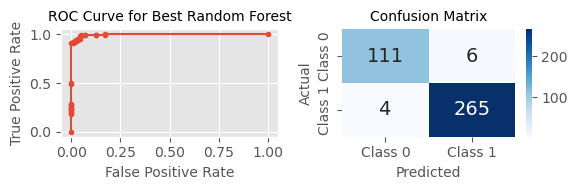


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.97      0.95      0.96       117
         Living       0.98      0.99      0.98       269

       accuracy                           0.97       386
      macro avg       0.97      0.97      0.97       386
   weighted avg       0.97      0.97      0.97       386



In [516]:
# Define the parameter grid for Random Forest
#rf_param_grid ={'criterion': ['entropy', 'gini'], 'n_estimators': [100,101,102],'max_depth': [20,21,22,23],'max_features': ['sqrt', 'log2'],'min_samples_split': [2,3,5],'min_samples_leaf': [2,3,5],'max_leaf_nodes': [None,1,3,5]}

rf_param_grid =  {'criterion': ['gini'],
                                     'max_depth': [20],
                                     'max_features': ['sqrt'],
                                     'max_leaf_nodes': [None],
                                     'min_samples_leaf':[2],
                                     'min_samples_split': [5],
                                     'n_estimators':[ 101]}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=kfold,
                              scoring='roc_auc',  # Score based on ROC-AUC
                              n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
rf_grid_search.fit(X_train_random, y_train_random)

# Get the best parameters and the best score
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best ROC-AUC score for Random Forest: ", rf_grid_search.best_score_)

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model
#rf_test_pred, rf_test_score, rf_cv_score, rf_auc_score = classic_model(best_rf_model, kfold, X_train_random, X_test_random, y_train_random, y_test_random, "Best Random Forest")

rf_test_pred, rf_test_score, rf_train_score, rf_cv_score, rf_auc_score = classic_model(
    best_rf_model, kfold, X_train_random, X_test_random, y_train_random, y_test_random, "Best Random Forest"
)

model_results['Model'].append("Best Random Forest")
model_results['Train Score'].append(rf_train_score)
model_results['Test Score'].append(rf_test_score)
model_results['CV Mean Score'].append(rf_cv_score)
model_results['ROC-AUC Score'].append(rf_auc_score)
#model_results['Classification Report'].append(randomforest_classification_rep)

# XGBoost

XGBoost
CV scores:  [0.97734628 0.96116505 0.96440129 0.96763754 0.96753247]
CV Standard Deviation:  0.005415438349101794
CV Mean score:  0.9676165258689531
Train score:    1.0
Test score:     0.9715025906735751
ROC-AUC Score:  0.9970450862644171


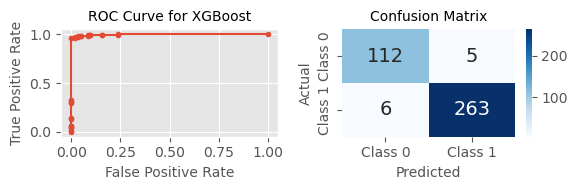


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.95      0.96      0.95       117
         Living       0.98      0.98      0.98       269

       accuracy                           0.97       386
      macro avg       0.97      0.97      0.97       386
   weighted avg       0.97      0.97      0.97       386



In [519]:
xgboost_model = XGBClassifier(random_state=42)
xgboost_test_pred, xgboost_test_score,xgboost_train_score, xgboost_cv_score, xgboost_auc_score = classic_model(xgboost_model, kfold, X_train, X_test, y_train, y_test, "XGBoost")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for XGBoost:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 2, 'subsample': 0.8}
Best ROC-AUC score:  0.9964539439916054
XGBoost with Hypertuning
CV scores:  [0.98058252 0.9579288  0.96116505 0.96116505 0.97077922]
CV Standard Deviation:  0.008329026429854875
CV Mean score:  0.9663241289454882
Train score:    1.0
Test score:     0.9792746113989638
ROC-AUC Score:  0.9980300575096115


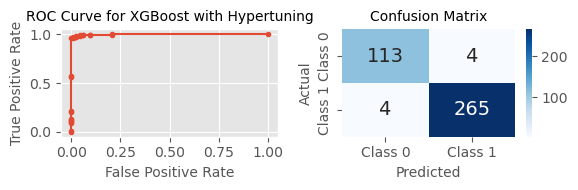


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.97      0.97      0.97       117
         Living       0.99      0.99      0.99       269

       accuracy                           0.98       386
      macro avg       0.98      0.98      0.98       386
   weighted avg       0.98      0.98      0.98       386



In [521]:
# Convert X_train to a numpy array if it's not already
label_encoder = LabelEncoder()

# Encode target variable
y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

if isinstance(X_train, pd.DataFrame):
    X_train_np = X_train.to_numpy()
else:
    X_train_np = X_train  # Already a numpy array

# Convert y_train_encoded to a numpy array if it's not already
if isinstance(y_train_encoded, pd.Series):
    y_train_np = y_train_encoded.to_numpy()
else:
    y_train_np = y_train_encoded  # Already a numpy array

# Define the parameter grid for tuning XGBoost
#xgb_param_grid = {'n_estimators': [50, 100, 150],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1.0],
#'colsample_bytree': [0.8, 1.0],'gamma': [0, 0.1, 0.2],'reg_alpha': [0, 0.1, 0.5],'reg_lambda': [1, 1.5, 2]}

xgb_param_grid =   {'colsample_bytree': [0.8], # Subsample ratio of columns when constructing each tree
                    'gamma': [0.2],            # Minimum loss reduction to make a further partition on a leaf node
                    'learning_rate': [0.2],    # Step size shrinkage
                    'max_depth': [7],          # Maximum depth of the tree
                    'n_estimators': [100],     # Number of trees
                    'reg_alpha': [0.],         # L1 regularization term on weights
                    'reg_lambda':[2],          # L2 regularization term on weights
                    'subsample':[ 0.8]}        # Subsample ratio of the training instance

# Define a stratified k-fold cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with the XGBoost classifier
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=kfold,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    error_score='raise'  # Raises detailed errors for debugging
)

# Fit the GridSearchCV with the training data
xgb_grid_search.fit(X_train_np, y_train_np)

# Get the best parameters and best score
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best ROC-AUC score: ", xgb_grid_search.best_score_)

# Optionally, get the best estimator
best_xgb_model = xgb_grid_search.best_estimator_

#xgboost_test_pred, xgboost_test_score, xgboost_cv_score, xgboost_auc_score = classic_model(best_xgb_model, kfold, X_train, X_test, y_train, y_test, "XGBoost with Hypertuning")

xgboost_test_pred, xgboost_test_score, xgboost_train_score, xgboost_cv_score, xgboost_auc_score = classic_model(
    best_xgb_model, kfold, X_train, X_test, y_train, y_test, "XGBoost with Hypertuning")

model_results['Model'].append("Best XGBoost")
model_results['Train Score'].append(xgboost_train_score)
model_results['Test Score'].append(xgboost_test_score)
model_results['CV Mean Score'].append(xgboost_cv_score)
model_results['ROC-AUC Score'].append(xgboost_auc_score)
#model_results['Classification Report'].append(xgboost_classification_rep)

# SVM

SVM
CV scores:  [0.96440129 0.94498382 0.93851133 0.95469256 0.94480519]
CV Standard Deviation:  0.009079614629704724
CV Mean score:  0.9494788383137898
Train score:    0.9876943005181347
Test score:     0.961139896373057
ROC-AUC Score:  0.9937088933371462


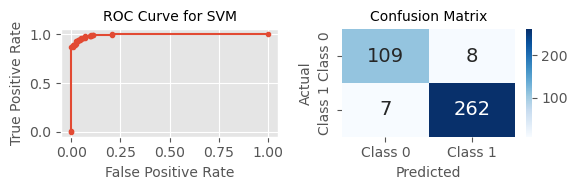


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.94      0.93      0.94       117
         Living       0.97      0.97      0.97       269

       accuracy                           0.96       386
      macro avg       0.96      0.95      0.95       386
   weighted avg       0.96      0.96      0.96       386



In [524]:
svm_model = SVC(probability=True, random_state=42)  # Ensure probability=True for predict_proba
svm_test_pred, svm_test_score, svm_train_score,svm_cv_score, svm_auc_score= classic_model(
    svm_model, kfold, X_train, X_test, y_train, y_test, "SVM")

model_results['Model'].append("SVM Tree")
model_results['Train Score'].append(svm_train_score)
model_results['Test Score'].append(svm_test_score)
model_results['CV Mean Score'].append(svm_cv_score)
model_results['ROC-AUC Score'].append(svm_auc_score)
#model_results['Classification Report'].append(svm_classification_rep)

# DecisionTree

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best ROC-AUC score for Decision Tree:  0.9927561671948328
Best Decision Tree
CV scores:  [0.96440129 0.94822006 0.93851133 0.94498382 0.94805195]
CV Standard Deviation:  0.008540616553060999
CV Mean score:  0.9488336905812634
Train score:    0.9566062176165803
Test score:     0.9637305699481865
ROC-AUC Score:  0.9922314364693546


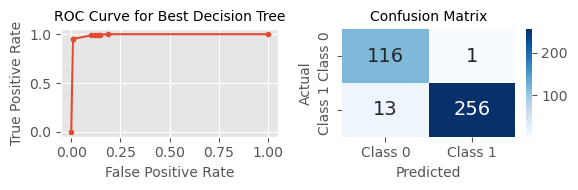


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.90      0.99      0.94       117
         Living       1.00      0.95      0.97       269

       accuracy                           0.96       386
      macro avg       0.95      0.97      0.96       386
   weighted avg       0.97      0.96      0.96       386



In [527]:
# Define the parameter grid for Random Forest
#rf_param_grid =[{'criterion': ['entropy', 'gini'],
#                     'max_depth': [10, 15, 20],
#                     'max_features': ['sqrt', 'log2'],
#                     'min_samples_split': [2, 5, 8, 11],
#                     'min_samples_leaf': [1, 5, 9],
#                     'max_leaf_nodes': [2, 5, 8, 11]}]

rf_param_grid ={'criterion': ['gini'], 'max_depth': [10], 'max_features': ['sqrt'], 'max_leaf_nodes':[11], 'min_samples_leaf':[ 9],
                 'min_samples_split': [2]}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=kfold,
                              scoring='roc_auc',  # Score based on ROC-AUC
                              n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters for Decision Tree: ", rf_grid_search.best_params_)
print("Best ROC-AUC score for Decision Tree: ", rf_grid_search.best_score_)

# Get the best model
dt_model = rf_grid_search.best_estimator_

# Evaluate the best model
#dt_test_pred, dt_test_score, dt_cv_score, dt_auc_score = classic_model(dt_model, kfold, X_train, X_test, y_train, y_test, "Best Decision Tree")

dt_test_pred, dt_test_score, dt_train_score, dt_cv_score, dt_auc_score= classic_model(
    dt_model, kfold, X_train, X_test, y_train, y_test, "Best Decision Tree"
)

model_results['Model'].append("Decision Tree")
model_results['Train Score'].append(dt_train_score)
model_results['Test Score'].append(dt_test_score)
model_results['CV Mean Score'].append(dt_cv_score)
model_results['ROC-AUC Score'].append(dt_auc_score)
#model_results['Classification Report'].append(dt_classification_rep)

                                              Feature  Importance
65                       Relapse Free Status_Recurred    0.252556
10                          Overall Survival (Months)    0.131616
2                           Overall Survival (Months)    0.109793
6                    Relapse Free Status (Months)_log    0.091534
14                   Relapse Free Status (Months)_log    0.067714
55                              Integrative Cluster_8    0.034226
26                   Pam50 + Claudin-low subtype_LumA    0.032213
3                                          Cohort_log    0.024956
1                         Nottingham prognostic index    0.022237
11                                         Cohort_log    0.021599
0                                    Age at Diagnosis    0.020939
9                         Nottingham prognostic index    0.020523
8                                    Age at Diagnosis    0.020199
4                   Lymph nodes examined positive_log    0.012959
64        

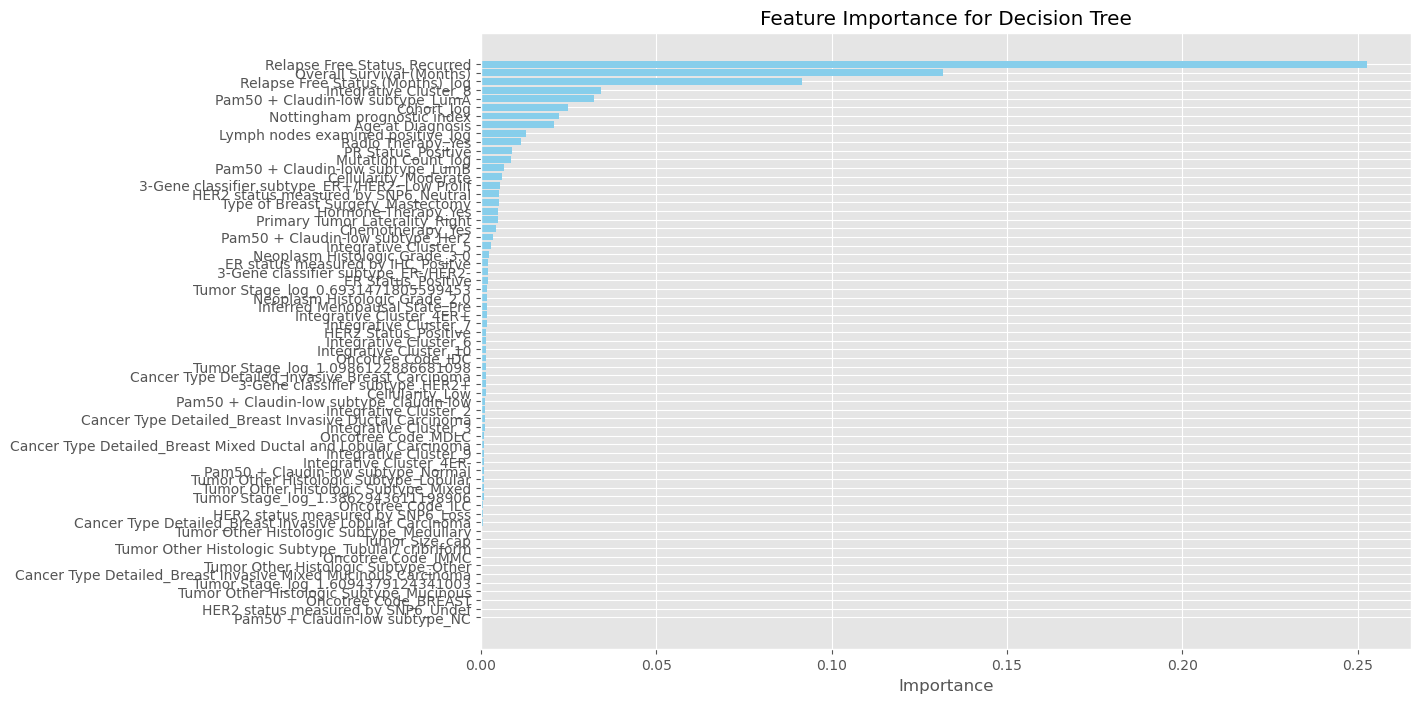

In [529]:
# Fit the best model (in case it's not already fitted)
best_rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importances_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [531]:
df_rf_feature=df_feature.drop(columns=['Chemotherapy','Cancer Type'],axis=1)
#df_cleaned['Chemotherapy','Cancer Type'

#df_cleaned['3-Gene classifier subtype'
categorical_rf_columns = df_rf_feature.select_dtypes(include=['object']).columns.tolist()

#make dummy datafram for catagorical columns
dummy_rf_var=pd.get_dummies(data=df_rf_feature,columns=categorical_rf_columns,drop_first=True,dtype='int8')

numerical_rf_columns = df_rf_feature.select_dtypes(include=[np.number])

X_rf=pd.concat([numerical_rf_columns,dummy_rf_var],axis=1)
X_train_decision,X_test_decision,y_train_decision,y_test_decision = train_test_split(X_rf, df_target, random_state = 10, test_size = 0.2)

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best ROC-AUC score for Decision Tree:  0.9777466516625413
Best Decision Tree
CV scores:  [0.92556634 0.88996764 0.94174757 0.94498382 0.95454545]
CV Standard Deviation:  0.022706692920134632
CV Mean score:  0.9313621653427478
Train score:    0.969559585492228
Test score:     0.9689119170984456
ROC-AUC Score:  0.993327614145458


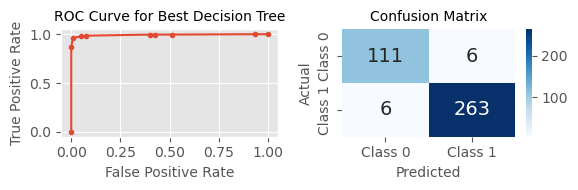


Classification Report:  
                 precision    recall  f1-score   support

Died of Disease       0.95      0.95      0.95       117
         Living       0.98      0.98      0.98       269

       accuracy                           0.97       386
      macro avg       0.96      0.96      0.96       386
   weighted avg       0.97      0.97      0.97       386



In [533]:
# Define the parameter grid for Random Forest

rf_param_grid ={'criterion': ['gini'], 'max_depth': [10], 'max_features': ['sqrt'], 'max_leaf_nodes':[11], 'min_samples_leaf':[ 9],
                 'min_samples_split': [2]}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=kfold,
                              scoring='roc_auc',  # Score based on ROC-AUC
                              n_jobs=-1)  # Use all available cores

# Fit GridSearchCV
rf_grid_search.fit(X_train_decision, y_train_decision)

# Get the best parameters and the best score
print("Best parameters for Decision Tree: ", rf_grid_search.best_params_)
print("Best ROC-AUC score for Decision Tree: ", rf_grid_search.best_score_)

# Get the best model
best_dt_model = rf_grid_search.best_estimator_

# Evaluate the best model
dt1_test_pred, dt1_test_score,dt1_train_score, dt1_cv_score, dt1_auc_score = classic_model(
    best_dt_model, kfold, X_train_decision, X_test_decision, y_train_decision, y_test_decision, "Best Decision Tree")

model_results['Model'].append("Best Decision Tree")
model_results['Train Score'].append(dt1_train_score)
model_results['Test Score'].append(dt1_test_score)
model_results['CV Mean Score'].append(dt1_cv_score)
model_results['ROC-AUC Score'].append(dt1_auc_score)

# Model Comparison

In [535]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame(model_results)

# Display the results
print(results_df)

                Model  Train Score  Test Score  CV Mean Score  ROC-AUC Score
0  Best Logistic Tree     0.965674    0.974093       0.952072       0.989642
1  Best Random Forest     0.998705    0.974093       0.954665       0.996124
2        Best XGBoost     1.000000    0.979275       0.966324       0.998030
3            SVM Tree     0.987694    0.961140       0.949479       0.993709
4       Decision Tree     0.956606    0.963731       0.948834       0.992231
5  Best Decision Tree     0.969560    0.968912       0.931362       0.993328


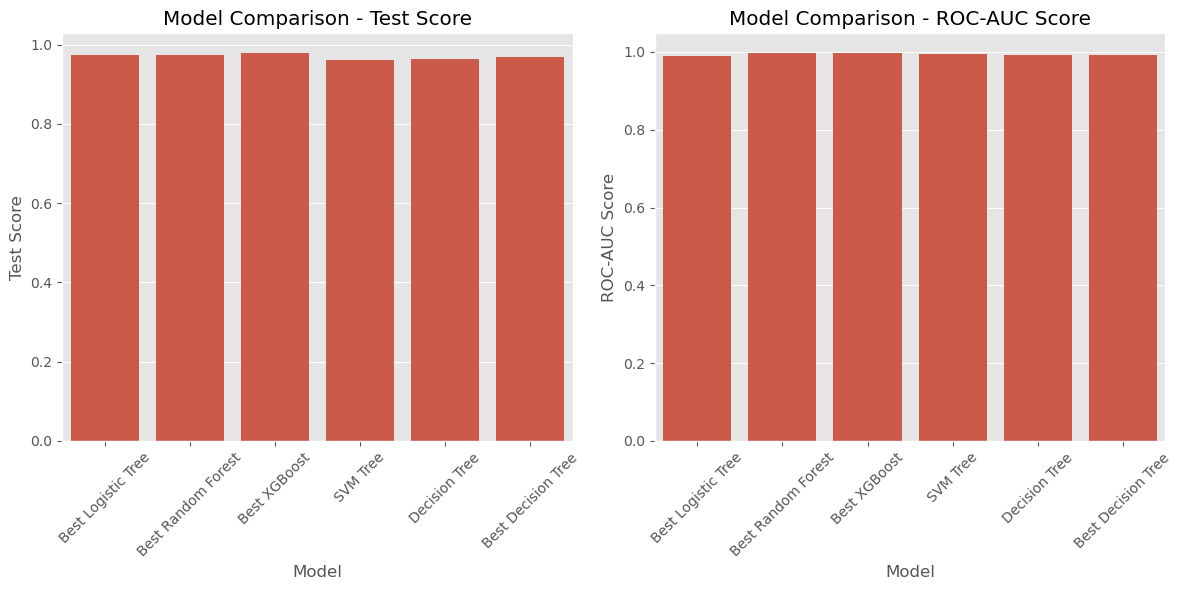

In [537]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

# Plot comparison of Test Scores on the first subplot
sns.barplot(x='Model', y='Test Score', data=results_df, ax=axes[0])
axes[0].set_title('Model Comparison - Test Score')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot comparison of ROC-AUC Scores on the second subplot
sns.barplot(x='Model', y='ROC-AUC Score', data=results_df, ax=axes[1])
axes[1].set_title('Model Comparison - ROC-AUC Score')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Evaluating the Metrics

In [540]:
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)

    metrics = {
        "precision_0": report.get("Died of Disease", {}).get("precision", None),
        "precision_1": report.get("Living", {}).get("precision", None),
        "recall_0": report.get("Died of Disease", {}).get("recall", None),
        "recall_1": report.get("Living", {}).get("recall", None),
        "f1_0": report.get("Died of Disease", {}).get("f1-score", None),
        "f1_1": report.get("Living", {}).get("f1-score", None),
        "macro_avg_precision": report.get("macro avg", {}).get("precision", None),
        "macro_avg_recall": report.get("macro avg", {}).get("recall", None),
        "macro_avg_f1": report.get("macro avg", {}).get("f1-score", None),
        "accuracy": accuracy_score(y_true, y_pred)
    }

    return metrics

# Extract metrics for each model
logistic_metrics = extract_metrics(y_test_logistic, logistic_test_pred)
rf_metrics = extract_metrics(y_test_random, rf_test_pred)
xgb_metrics = extract_metrics(y_test, xgboost_test_pred)
dt_metrics = extract_metrics(y_test_decision, dt_test_pred)
svm_metrics = extract_metrics(y_test,svm_test_pred)

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([
    {"Model": "Best Logistic Regression", **logistic_metrics},
    {"Model": "Best Random Forest", **rf_metrics},
    {"Model": "Best XGBoost", **xgb_metrics},
    {"Model": "Best Decision Tree", **dt_metrics},
    {"Model": "SVM Tree", **svm_metrics}
])

print(metrics_df.round(2))

                      Model  precision_0  precision_1  recall_0  recall_1  \
0  Best Logistic Regression     0.950000     0.990000  0.970000  0.980000   
1        Best Random Forest     0.970000     0.980000  0.950000  0.990000   
2              Best XGBoost     0.970000     0.990000  0.970000  0.990000   
3        Best Decision Tree     0.900000     1.000000  0.990000  0.950000   
4                  SVM Tree     0.940000     0.970000  0.930000  0.970000   

      f1_0     f1_1  macro_avg_precision  macro_avg_recall  macro_avg_f1  \
0 0.960000 0.980000             0.970000          0.970000      0.970000   
1 0.960000 0.980000             0.970000          0.970000      0.970000   
2 0.970000 0.990000             0.980000          0.980000      0.980000   
3 0.940000 0.970000             0.950000          0.970000      0.960000   
4 0.940000 0.970000             0.960000          0.950000      0.950000   

   accuracy  
0  0.970000  
1  0.970000  
2  0.980000  
3  0.960000  
4  0.96000

In [542]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)

    metrics = {
        "precision_0": report.get("Died of Disease", {}).get("precision", None),
        "precision_1": report.get("Living", {}).get("precision", None),
        "recall_0": report.get("Died of Disease", {}).get("recall", None),
        "recall_1": report.get("Living", {}).get("recall", None),
        "f1_0": report.get("Died of Disease", {}).get("f1-score", None),
        "f1_1": report.get("Living", {}).get("f1-score", None),
        "combined_precision": (report.get("Died of Disease", {}).get("precision", 0) + report.get("Living", {}).get("precision", 0)) / 2,
        "combined_recall": (report.get("Died of Disease", {}).get("recall", 0) + report.get("Living", {}).get("recall", 0)) / 2,
        "combined_f1": (report.get("Died of Disease", {}).get("f1-score", 0) + report.get("Living", {}).get("f1-score", 0)) / 2,
        "macro_avg_precision": report.get("macro avg", {}).get("precision", None),
        "macro_avg_recall": report.get("macro avg", {}).get("recall", None),
        "macro_avg_f1": report.get("macro avg", {}).get("f1-score", None),
        "accuracy": accuracy_score(y_true, y_pred)
    }

    return metrics

# Extract metrics for each model
logistic_metrics = extract_metrics(y_test_logistic, logistic_test_pred)
rf_metrics = extract_metrics(y_test_random, rf_test_pred)
xgb_metrics = extract_metrics(y_test, xgboost_test_pred)
dt_metrics = extract_metrics(y_test_decision, dt_test_pred)
svm_metrics = extract_metrics(y_test, svm_test_pred)

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([
    {"Model": "Best Logistic Regression", **logistic_metrics},
    {"Model": "Best Random Forest", **rf_metrics},
    {"Model": "Best XGBoost", **xgb_metrics},
    {"Model": "Best Decision Tree", **dt_metrics},
    {"Model": "SVM Tree", **svm_metrics}
])

# Round values for readability
metrics_df = metrics_df.round(2)

print(metrics_df)


                      Model  precision_0  precision_1  recall_0  recall_1  \
0  Best Logistic Regression     0.950000     0.990000  0.970000  0.980000   
1        Best Random Forest     0.970000     0.980000  0.950000  0.990000   
2              Best XGBoost     0.970000     0.990000  0.970000  0.990000   
3        Best Decision Tree     0.900000     1.000000  0.990000  0.950000   
4                  SVM Tree     0.940000     0.970000  0.930000  0.970000   

      f1_0     f1_1  combined_precision  combined_recall  combined_f1  \
0 0.960000 0.980000            0.970000         0.970000     0.970000   
1 0.960000 0.980000            0.970000         0.970000     0.970000   
2 0.970000 0.990000            0.980000         0.980000     0.980000   
3 0.940000 0.970000            0.950000         0.970000     0.960000   
4 0.940000 0.970000            0.960000         0.950000     0.950000   

   macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
0             0.970000         